# HyperzMass Results

This is where I'm going to clean and analyse the results from my HyperzMass runs. The four runs differed only in filter set:

1. all filters (i.e. u, g, r, i, z, VIS, Y, J, H), aka `all`
2. discounting the u-band (i.e. g, r, i, z, VIS, Y, J, H), aka `nou`
3. ground-based setup (i.e. u, g, r, i, z), aka `gnd`
4. euclid-only setup (i.e. VIS, Y, J, H), aka `euc`

These proved to be an interesting set of options to work with from our previous studies, and we hypothesise that the results from runs discounting the u-band may be surprisingly more accurate.

### Parameters

The parameters used in each run can be found under param in the GitHub repository __[here](https://github.com/cjscullion/galaxy-properties-euclid)__. All the runs used the same version of Hyperz, the same templates, the same transmission filter.res file. The only change was to the filters 'mag' file, for which I commented out the filters that weren't to be included in each run. This also meant that I had to change the M_ABS filter choice, for which I chose the bluest filter in each run. 

The items selected from Claudia's simulation were identical for each run, the only difference in the catalogues was to not include the columns for filters we didn't want to include in the run. 

I'll soon upload the notebook which I used to generate the photometric errors and $\Delta m$'s

## Loading and cleaning the data

Specifically I'll just be looking at the .zmass files and maybe the .phys files for now. The important .out_zmass files will also be available on my repository. **TO DO**

In [1]:
import pandas as pd
import numpy as np

In [2]:
path_to_results = '/home/chris/Documents/Hyperz/results/'

In [3]:
all_headers = pd.read_csv(path_to_results + 'all_filt_results/all.zmass',
                          sep='\s+', nrows=0).columns[1:]
all_zmass_df = pd.read_csv(path_to_results + 'all_filt_results/all.zmass',
                           header=None, skiprows=1, sep='\s+', names=all_headers, index_col=0)
all_zmass_df

,redshift,chi2,P_chi2,iSED,iage,age[Gyr],A_V,norm,log(Mgal/Msun),log(M*/Msun),...,logM*(99)low,logM*(99)up,logM*(90)low,logM*(90)up,logM*(68)low,logM*(68)up,SFR[Msun/yr],tau[Gyr],Nfilt,D_L[Mpc]
ID,,,,,,,,,,,,,,,,,,,,,
1,4.77,25.248,0.0,19,22,0.0905,0.0,1.352500e-13,10.870871,10.818779,...,10.818779,10.830603,10.818779,10.830603,10.818779,10.823511,817.25900,10.0,9,44156.437
2,0.69,9999.999,0.0,19,22,0.0905,0.0,1.516700e-08,13.874836,13.822744,...,13.822743,13.822745,13.822743,13.822744,13.822744,13.822744,824754.00000,10.0,9,4188.814
3,2.39,1.662,10.2,7,26,0.3602,0.8,9.215400e-16,10.019764,9.929675,...,9.110314,10.831530,9.541567,10.620827,9.788450,10.455186,2.93379,0.1,9,19321.638
4,4.86,66.616,0.0,19,22,0.0905,0.0,7.430200e-13,11.629824,11.577732,...,11.577732,11.589670,11.577732,11.583987,11.577732,11.580019,4691.51000,10.0,9,45137.491
5,4.05,33.543,0.0,31,22,0.0905,0.6,2.654400e-13,11.997831,11.943318,...,11.943318,11.993523,11.943318,11.958173,11.943318,11.958173,10997.30000,-10.0,9,36398.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1.85,9999.999,0.0,19,22,0.0905,0.0,2.284800e-10,13.108977,13.056885,...,13.056885,13.056896,13.056885,13.056889,13.056885,13.056886,141405.00000,10.0,9,14131.493
997,0.11,9999.999,0.0,6,44,12.5000,3.0,5.129600e-09,-inf,13.470370,...,13.470360,13.470370,13.470366,13.470370,13.470368,13.470370,0.00000,0.0,9,510.209
998,0.26,993.417,0.0,18,29,1.0152,0.0,6.397900e-09,14.346247,14.245050,...,14.244682,14.245060,14.244900,14.245054,14.244995,14.245052,126113.00000,1.0,9,1318.943


Many objects were 'undetected', and so weren't fit and are given 99. across the board, or huge $\chi^2$. So I'm filtering them out by age and replacing those items with NaN just to avoid any weird plotting confusion in the future. N.B. the `euc` run had way more of these undetected objects than any other.

<AxesSubplot:>

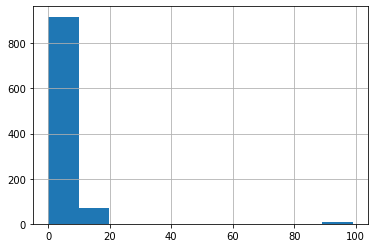

In [4]:
all_zmass_df['age[Gyr]'].hist()

In [37]:
all_zmass_df[all_zmass_df['age[Gyr]'] > 20] = np.nan # 20 is the AGEMAX
all_zmass_df[all_zmass_df['age[Gyr]'].isnull()]

,redshift,chi2,P_chi2,iSED,iage,age[Gyr],A_V,norm,log(Mgal/Msun),log(M*/Msun),...,logM*(99)low,logM*(99)up,logM*(90)low,logM*(90)up,logM*(68)low,logM*(68)up,SFR[Msun/yr],tau[Gyr],Nfilt,D_L[Mpc]
ID,,,,,,,,,,,,,,,,,,,,,
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nice, let's do the same for the others.

In [39]:
nou_headers = pd.read_csv(path_to_results + 'nou_filt_results/nou.zmass',
                          sep='\s+', nrows=0).columns[1:]
nou_zmass_df = pd.read_csv(path_to_results + 'nou_filt_results/nou.zmass',
                           header=None, skiprows=1, sep='\s+', names=nou_headers, index_col=0)

nou_zmass_df[nou_zmass_df['age[Gyr]'] > 20] = np.nan # 20 is the AGEMAX
nou_zmass_df

,redshift,chi2,P_chi2,iSED,iage,age[Gyr],A_V,norm,log(Mgal/Msun),log(M*/Msun),...,logM*(99)low,logM*(99)up,logM*(90)low,logM*(90)up,logM*(68)low,logM*(68)up,SFR[Msun/yr],tau[Gyr],Nfilt,D_L[Mpc]
ID,,,,,,,,,,,,,,,,,,,,,
1,4.77,27.434,0.00,19.0,22.0,0.0905,0.0,1.352500e-13,10.870871,10.818779,...,10.818779,10.830603,10.818779,10.830603,10.818779,10.823511,817.25900,10.0,8.0,44156.437
2,0.69,9999.999,0.00,19.0,22.0,0.0905,0.0,1.480200e-08,13.864258,13.812166,...,13.812166,13.812169,13.812166,13.812167,13.812166,13.812167,804909.00000,10.0,8.0,4188.814
3,2.39,1.558,14.26,16.0,34.0,2.6000,0.3,2.396200e-15,10.413262,10.290112,...,9.286750,10.774425,9.651034,10.637728,9.894936,10.421297,2.07785,1.0,8.0,19321.638
4,4.86,70.051,0.00,19.0,22.0,0.0905,0.0,7.430200e-13,11.629824,11.577732,...,11.577732,11.589670,11.577732,11.583987,11.577732,11.580019,4691.51000,10.0,8.0,45137.491
5,4.05,34.883,0.00,31.0,22.0,0.0905,0.6,2.654400e-13,11.997831,11.943318,...,11.943318,11.993523,11.943318,11.958173,11.943318,11.958173,10997.30000,-10.0,8.0,36398.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1.85,9999.999,0.00,25.0,22.0,0.0905,0.0,2.510800e-12,13.151894,13.097382,...,13.097382,13.097382,13.097382,13.097382,13.097382,13.097382,156801.00000,-10.0,8.0,14131.493
997,0.11,9999.999,0.00,6.0,44.0,12.5000,3.0,5.137200e-09,-inf,13.471018,...,13.471008,13.471018,13.471014,13.471018,13.471017,13.471018,0.00000,0.0,8.0,510.209
998,0.26,736.230,0.00,14.0,27.0,0.5088,0.2,4.380400e-09,14.289133,14.197568,...,14.197555,14.197742,14.197563,14.197639,14.197566,14.197594,145695.00000,0.3,8.0,1318.943


In [40]:
gnd_headers = pd.read_csv(path_to_results + 'gnd_filt_results/gnd.zmass',
                          sep='\s+', nrows=0).columns[1:]
gnd_zmass_df = pd.read_csv(path_to_results + 'gnd_filt_results/gnd.zmass',
                           header=None, skiprows=1, sep='\s+', names=gnd_headers, index_col=0)

gnd_zmass_df[gnd_zmass_df['age[Gyr]'] > 20] = np.nan # 20 is the AGEMAX
gnd_zmass_df

,redshift,chi2,P_chi2,iSED,iage,age[Gyr],A_V,norm,log(Mgal/Msun),log(M*/Msun),...,logM*(99)low,logM*(99)up,logM*(90)low,logM*(90)up,logM*(68)low,logM*(68)up,SFR[Msun/yr],tau[Gyr],Nfilt,D_L[Mpc]
ID,,,,,,,,,,,,,,,,,,,,,
1,4.77,29.434,0.00,19.0,22.0,0.0905,0.0,1.427300e-13,10.894257,10.842165,...,10.842165,10.993191,10.842165,10.886841,10.842165,10.854437,8.624720e+02,10.0,5.0,44156.437
2,0.69,9999.999,0.00,31.0,22.0,0.0905,0.0,3.454200e-09,14.234240,14.179728,...,14.179728,14.179728,14.179728,14.179728,14.179728,14.179728,1.895370e+06,-10.0,5.0,4188.814
3,2.39,0.856,48.98,14.0,32.0,2.0000,1.3,5.117300e-13,12.775738,12.653056,...,8.869924,13.401665,9.035052,13.137241,9.540704,12.854148,2.534390e+01,0.3,5.0,19321.638
4,4.86,120.590,0.00,19.0,22.0,0.0905,0.0,7.566300e-13,11.637708,11.585616,...,11.585616,11.597634,11.585616,11.594372,11.585616,11.588816,4.777450e+03,10.0,5.0,45137.491
5,4.05,11.421,0.00,31.0,22.0,0.0905,0.9,5.713600e-13,12.330777,12.276265,...,12.217087,14.658631,12.276265,14.658631,12.276265,12.327940,2.367180e+04,-10.0,5.0,36398.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1.85,2765.571,0.00,19.0,22.0,0.0905,0.0,2.490000e-10,13.146320,13.094228,...,13.094228,13.095626,13.094228,13.094798,13.094228,13.094436,1.541020e+05,10.0,5.0,14131.493
997,0.11,7835.548,0.00,6.0,44.0,12.5000,3.0,3.644900e-09,-inf,13.321980,...,13.321865,13.321980,13.321933,13.321980,13.321963,13.321980,0.000000e+00,0.0,5.0,510.209
998,0.26,306.323,0.00,21.0,32.0,2.0000,0.0,2.580400e-08,14.405634,14.298525,...,14.298206,14.301370,14.298395,14.299685,14.298477,14.298949,1.149350e+05,10.0,5.0,1318.943


In [41]:
euc_headers = pd.read_csv(path_to_results + 'euc_filt_results/euc.zmass',
                          sep='\s+', nrows=0).columns[1:]
euc_zmass_df = pd.read_csv(path_to_results + 'euc_filt_results/euc.zmass',
                           header=None, skiprows=1, sep='\s+', names=euc_headers, index_col=0)

euc_zmass_df[euc_zmass_df['age[Gyr]'] > 20] = np.nan # 20 is the AGEMAX
euc_zmass_df

,redshift,chi2,P_chi2,iSED,iage,age[Gyr],A_V,norm,log(Mgal/Msun),log(M*/Msun),...,logM*(99)low,logM*(99)up,logM*(90)low,logM*(90)up,logM*(68)low,logM*(68)up,SFR[Msun/yr],tau[Gyr],Nfilt,D_L[Mpc]
ID,,,,,,,,,,,,,,,,,,,,,
1,4.77,26.000,0.00,19.0,22.0,0.0905,0.0,1.315800e-13,10.858930,10.806838,...,10.806838,10.824707,10.806838,10.818455,10.806838,10.813056,795.094,10.0,4.0,44156.437
2,0.69,9999.999,0.00,19.0,22.0,0.0905,0.0,1.192700e-08,13.770445,13.718353,...,13.718350,13.718362,13.718352,13.718356,13.718352,13.718354,648534.000,10.0,4.0,4188.814
3,2.39,0.869,45.64,6.0,24.0,0.1805,0.3,7.362500e-16,-inf,9.849301,...,9.346465,11.014695,9.578683,10.817383,9.689398,10.450352,0.000,0.0,4.0,19321.638
4,4.86,15.822,0.00,19.0,22.0,0.0905,0.0,7.359600e-13,11.625677,11.573585,...,11.573585,11.616886,11.573585,11.585484,11.573585,11.582048,4646.930,10.0,4.0,45137.491
5,4.05,28.107,0.00,31.0,22.0,0.0905,0.4,1.704300e-13,11.805419,11.750907,...,11.750907,11.800115,11.750907,11.765469,11.750907,11.765469,7061.120,-10.0,4.0,36398.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1.85,9999.999,0.00,25.0,22.0,0.0905,0.0,2.180100e-12,13.090568,13.036055,...,13.036055,13.036055,13.036055,13.036055,13.036055,13.036055,136151.000,-10.0,4.0,14131.493
997,0.11,9999.999,0.00,6.0,32.0,2.0000,3.0,1.205900e-09,-inf,12.865577,...,12.865297,12.865787,12.865463,12.865663,12.865536,12.865609,0.000,0.0,4.0,510.209
998,0.26,7.563,0.00,22.0,29.0,1.0152,0.1,3.946400e-08,14.316512,14.219044,...,14.218066,14.242729,14.218645,14.228702,14.218899,14.222575,193970.000,10.0,4.0,1318.943


In [2]:
#For future me:
all_zmass_df.to_csv('all_zmass_df.csv')
nou_zmass_df.to_csv('nou_zmass_df.csv')
gnd_zmass_df.to_csv('gnd_zmass_df.csv')
euc_zmass_df.to_csv('euc_zmass_df.csv')

NameError: name 'all_zmass_df' is not defined

## Analysis

In [1]:
import pandas as pd
import numpy as np

all_zmass_df = pd.read_csv('all_zmass_df.csv', index_col=0)
nou_zmass_df = pd.read_csv('nou_zmass_df.csv', index_col=0)
gnd_zmass_df = pd.read_csv('gnd_zmass_df.csv', index_col=0)
euc_zmass_df = pd.read_csv('euc_zmass_df.csv', index_col=0)

Now that everything is nicely in order, we can use this as a checkpoint moving forward. I'm going to try to understand what exactly each of the mass columns even means, since they are a little confusing to me.

In [2]:
all_zmass_df.columns

Index(['redshift', 'chi2', 'P_chi2', 'iSED', 'iage', 'age[Gyr]', 'A_V', 'norm',
       'log(Mgal/Msun)', 'log(M*/Msun)', 'mag1', 'mag2', 'mag3', 'mag4',
       'mag5', 'mag6', 'mag7', 'mag8', 'mag9', 'Mabs', 'logM*(99)low',
       'logM*(99)up', 'logM*(90)low', 'logM*(90)up', 'logM*(68)low',
       'logM*(68)up', 'SFR[Msun/yr]', 'tau[Gyr]', 'Nfilt', 'D_L[Mpc]', 'Z/H'],
      dtype='object')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sns.set_theme(context='notebook')
plt.rcParams['figure.dpi'] = 200

ValueError: supplied range of [-inf, 15.897899] is not finite

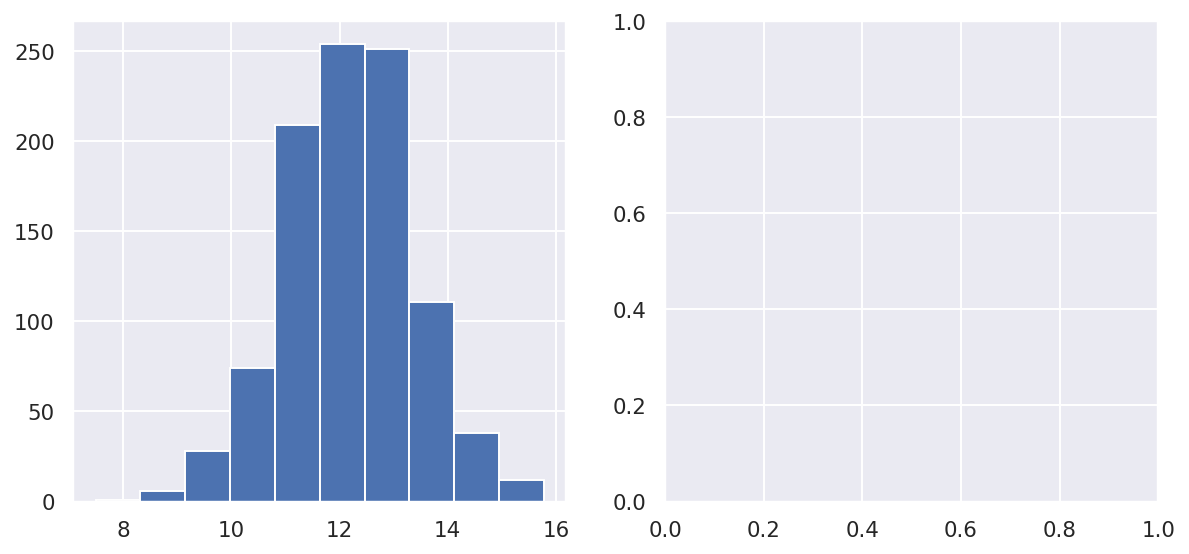

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(221)
all_zmass_df['log(M*/Msun)'].hist()
plt.subplot(222)
all_zmass_df['log(Mgal/Msun)'].hist()
plt.subplot(223)
all_zmass_df['SFR[Msun/yr]'].hist()
plt.subplot(224)
all_zmass_df['tau[Gyr]'].hist()

In [60]:
all_zmass_df.loc[all_zmass_df['log(Mgal/Msun)'] < 0]

,redshift,chi2,P_chi2,iSED,iage,age[Gyr],A_V,norm,log(Mgal/Msun),log(M*/Msun),...,logM*(99)low,logM*(99)up,logM*(90)low,logM*(90)up,logM*(68)low,logM*(68)up,SFR[Msun/yr],tau[Gyr],Nfilt,D_L[Mpc]
ID,,,,,,,,,,,,,,,,,,,,,
10,0.49,124.494,0.00,6.0,40.0,8.5000,2.5,7.182200e-11,-inf,13.089143,...,13.081514,13.089228,13.084030,13.089178,13.087025,13.089156,0.0,0.0,9.0,2767.547
22,2.53,1.705,9.15,4.0,23.0,0.1278,0.7,9.735500e-16,-inf,10.039035,...,9.511177,10.799413,9.715808,10.240008,9.868043,10.162971,0.0,0.0,9.0,20703.888
27,0.22,9999.999,0.00,6.0,43.0,11.5000,3.0,1.563100e-08,-inf,14.615721,...,14.615712,14.615721,14.615717,14.615721,14.615720,14.615721,0.0,0.0,9.0,1091.600
29,0.17,9999.999,0.00,6.0,43.0,11.5000,3.0,6.759900e-11,-inf,12.002208,...,12.002083,12.002208,12.002157,12.002208,12.002190,12.002208,0.0,0.0,9.0,819.078
33,0.09,9999.999,0.00,6.0,44.0,12.5000,3.0,5.229900e-09,-inf,13.292837,...,13.292828,13.292837,13.292833,13.292837,13.292835,13.292837,0.0,0.0,9.0,411.884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,0.07,9999.999,0.00,6.0,44.0,12.5000,3.0,1.843900e-08,-inf,13.609800,...,13.609744,13.609800,13.609777,13.609800,13.609792,13.609800,0.0,0.0,9.0,315.966
975,0.55,2417.675,0.00,6.0,32.0,2.0000,3.0,3.927700e-10,-inf,13.967764,...,13.967307,13.969101,13.967578,13.968309,13.967696,13.967964,0.0,0.0,9.0,3179.992
987,2.21,10.525,0.00,6.0,23.0,0.1278,0.3,5.506100e-15,-inf,10.646199,...,10.565549,10.806673,10.593204,10.763516,10.626828,10.723195,0.0,0.0,9.0,17565.100


This is weird. I'll have to ask Claudia about this. This implies that `Mgal/Msun -> 0`, therefore `Mgal -> 0` since `Msun` is constant.

For now I'll just see what the results greater than zero look like.

Text(0.5, 0, 'tau[Gyr]')

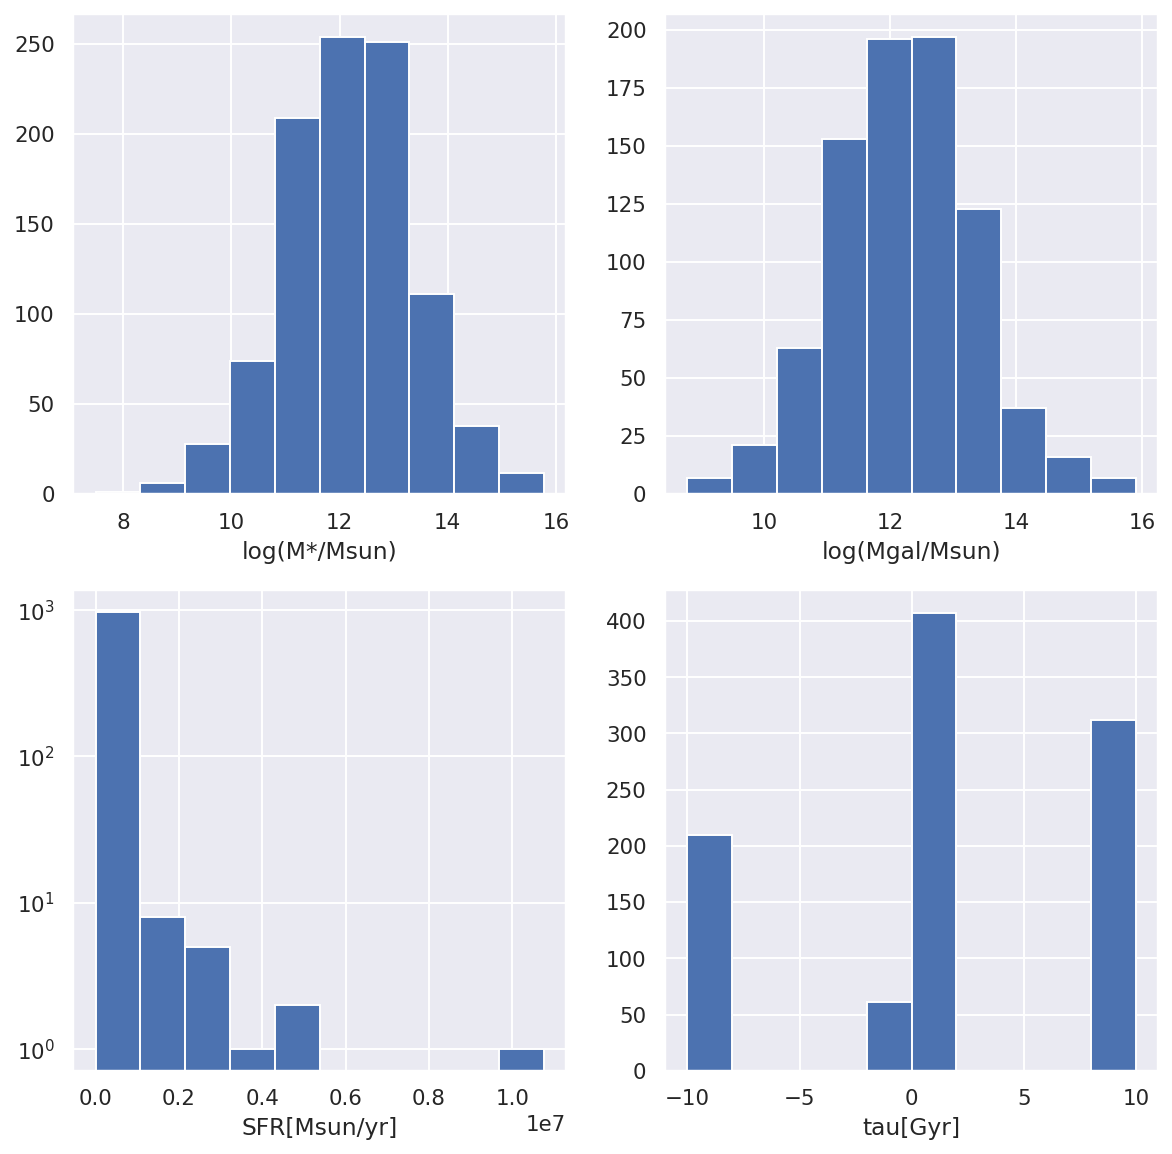

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(221)
all_zmass_df['log(M*/Msun)'].hist()
plt.xlabel('log(M*/Msun)')
plt.subplot(222)
all_zmass_df.loc[all_zmass_df['log(Mgal/Msun)'] > 0]['log(Mgal/Msun)'].hist()
plt.xlabel('log(Mgal/Msun)')
plt.subplot(223)
all_zmass_df['SFR[Msun/yr]'].hist(log=True)
plt.xlabel('SFR[Msun/yr]')
plt.subplot(224)
all_zmass_df['tau[Gyr]'].hist()
plt.xlabel('tau[Gyr]')

I have to say I'm really not sure what to make of these. I imagine the crazy $\tau$'s are more placeholders than anything, since they are what appears in the `.out_zmass` file for the ssp's, trunc, etc.

I guess the SFR is the current rate, and based on the age + SFH we have a full understanding of star formation?

`M*/Msun` seems to be the present mass in stars. And `Mgal/Msun` may be the entire mass (inc. non-stellar contributions?) By this logic, `Mgal > M*` ?

For now, lets just try to figure out some accuracies for the more simple values, as a function of filter set.

In [5]:
obs_df = pd.read_csv('observed_truen1000.csv', index_col=0)
obs_df.head()

,For_key_ID,LSST_u,LSST_g,LSST_r,LSST_i,LSST_z,VIS,NISP_Y,NISP_J,NISP_H,...,physical,delta_LSST_u,delta_LSST_g,delta_LSST_r,delta_LSST_i,delta_LSST_z,delta_VIS,delta_NISP_Y,delta_NISP_J,delta_NISP_H
ID,,,,,,,,,,,,,,,,,,,,,
1,664196,28.719878,25.401189,21.493210,20.948536,21.007141,21.374009,20.931209,21.322368,22.030668,...,True,0.344322,0.115826,0.041519,0.047046,0.060096,0.022503,0.086777,0.093662,0.107598
2,590121,7.905253,8.517532,9.088136,9.229868,9.600184,9.203728,10.118776,10.487087,10.619535,...,True,0.000137,0.000133,0.000290,0.000405,0.000565,0.000175,0.001006,0.001164,0.001225
3,669367,28.420486,26.783728,26.661817,25.428297,25.036981,26.944591,24.533737,24.392211,24.431951,...,True,0.319598,0.203913,0.331470,0.435516,0.542606,0.191904,0.684360,0.369662,0.246811
4,637045,26.182985,23.746710,19.892765,19.213896,19.114421,19.626215,19.035612,19.246821,19.734782,...,True,0.166389,0.059271,0.021874,0.022707,0.026620,0.011245,0.037765,0.039584,0.045299
5,803044,27.089987,22.066277,19.901048,19.628434,19.269790,19.788060,19.120893,19.325972,19.631161,...,True,0.220864,0.030136,0.021946,0.026968,0.028416,0.011993,0.039160,0.040889,0.043524


## Mock galaxy properties

In [6]:
obs_df.columns

Index(['For_key_ID', 'LSST_u', 'LSST_g', 'LSST_r', 'LSST_i', 'LSST_z', 'VIS',
       'NISP_Y', 'NISP_J', 'NISP_H', 'z', 't/Gyr', 'M*', 'M_initial', 'Z',
       'SFH', 'tau/Gyr', 'Av_law', 'Av', 't_l', 'physical', 'delta_LSST_u',
       'delta_LSST_g', 'delta_LSST_r', 'delta_LSST_i', 'delta_LSST_z',
       'delta_VIS', 'delta_NISP_Y', 'delta_NISP_J', 'delta_NISP_H'],
      dtype='object')

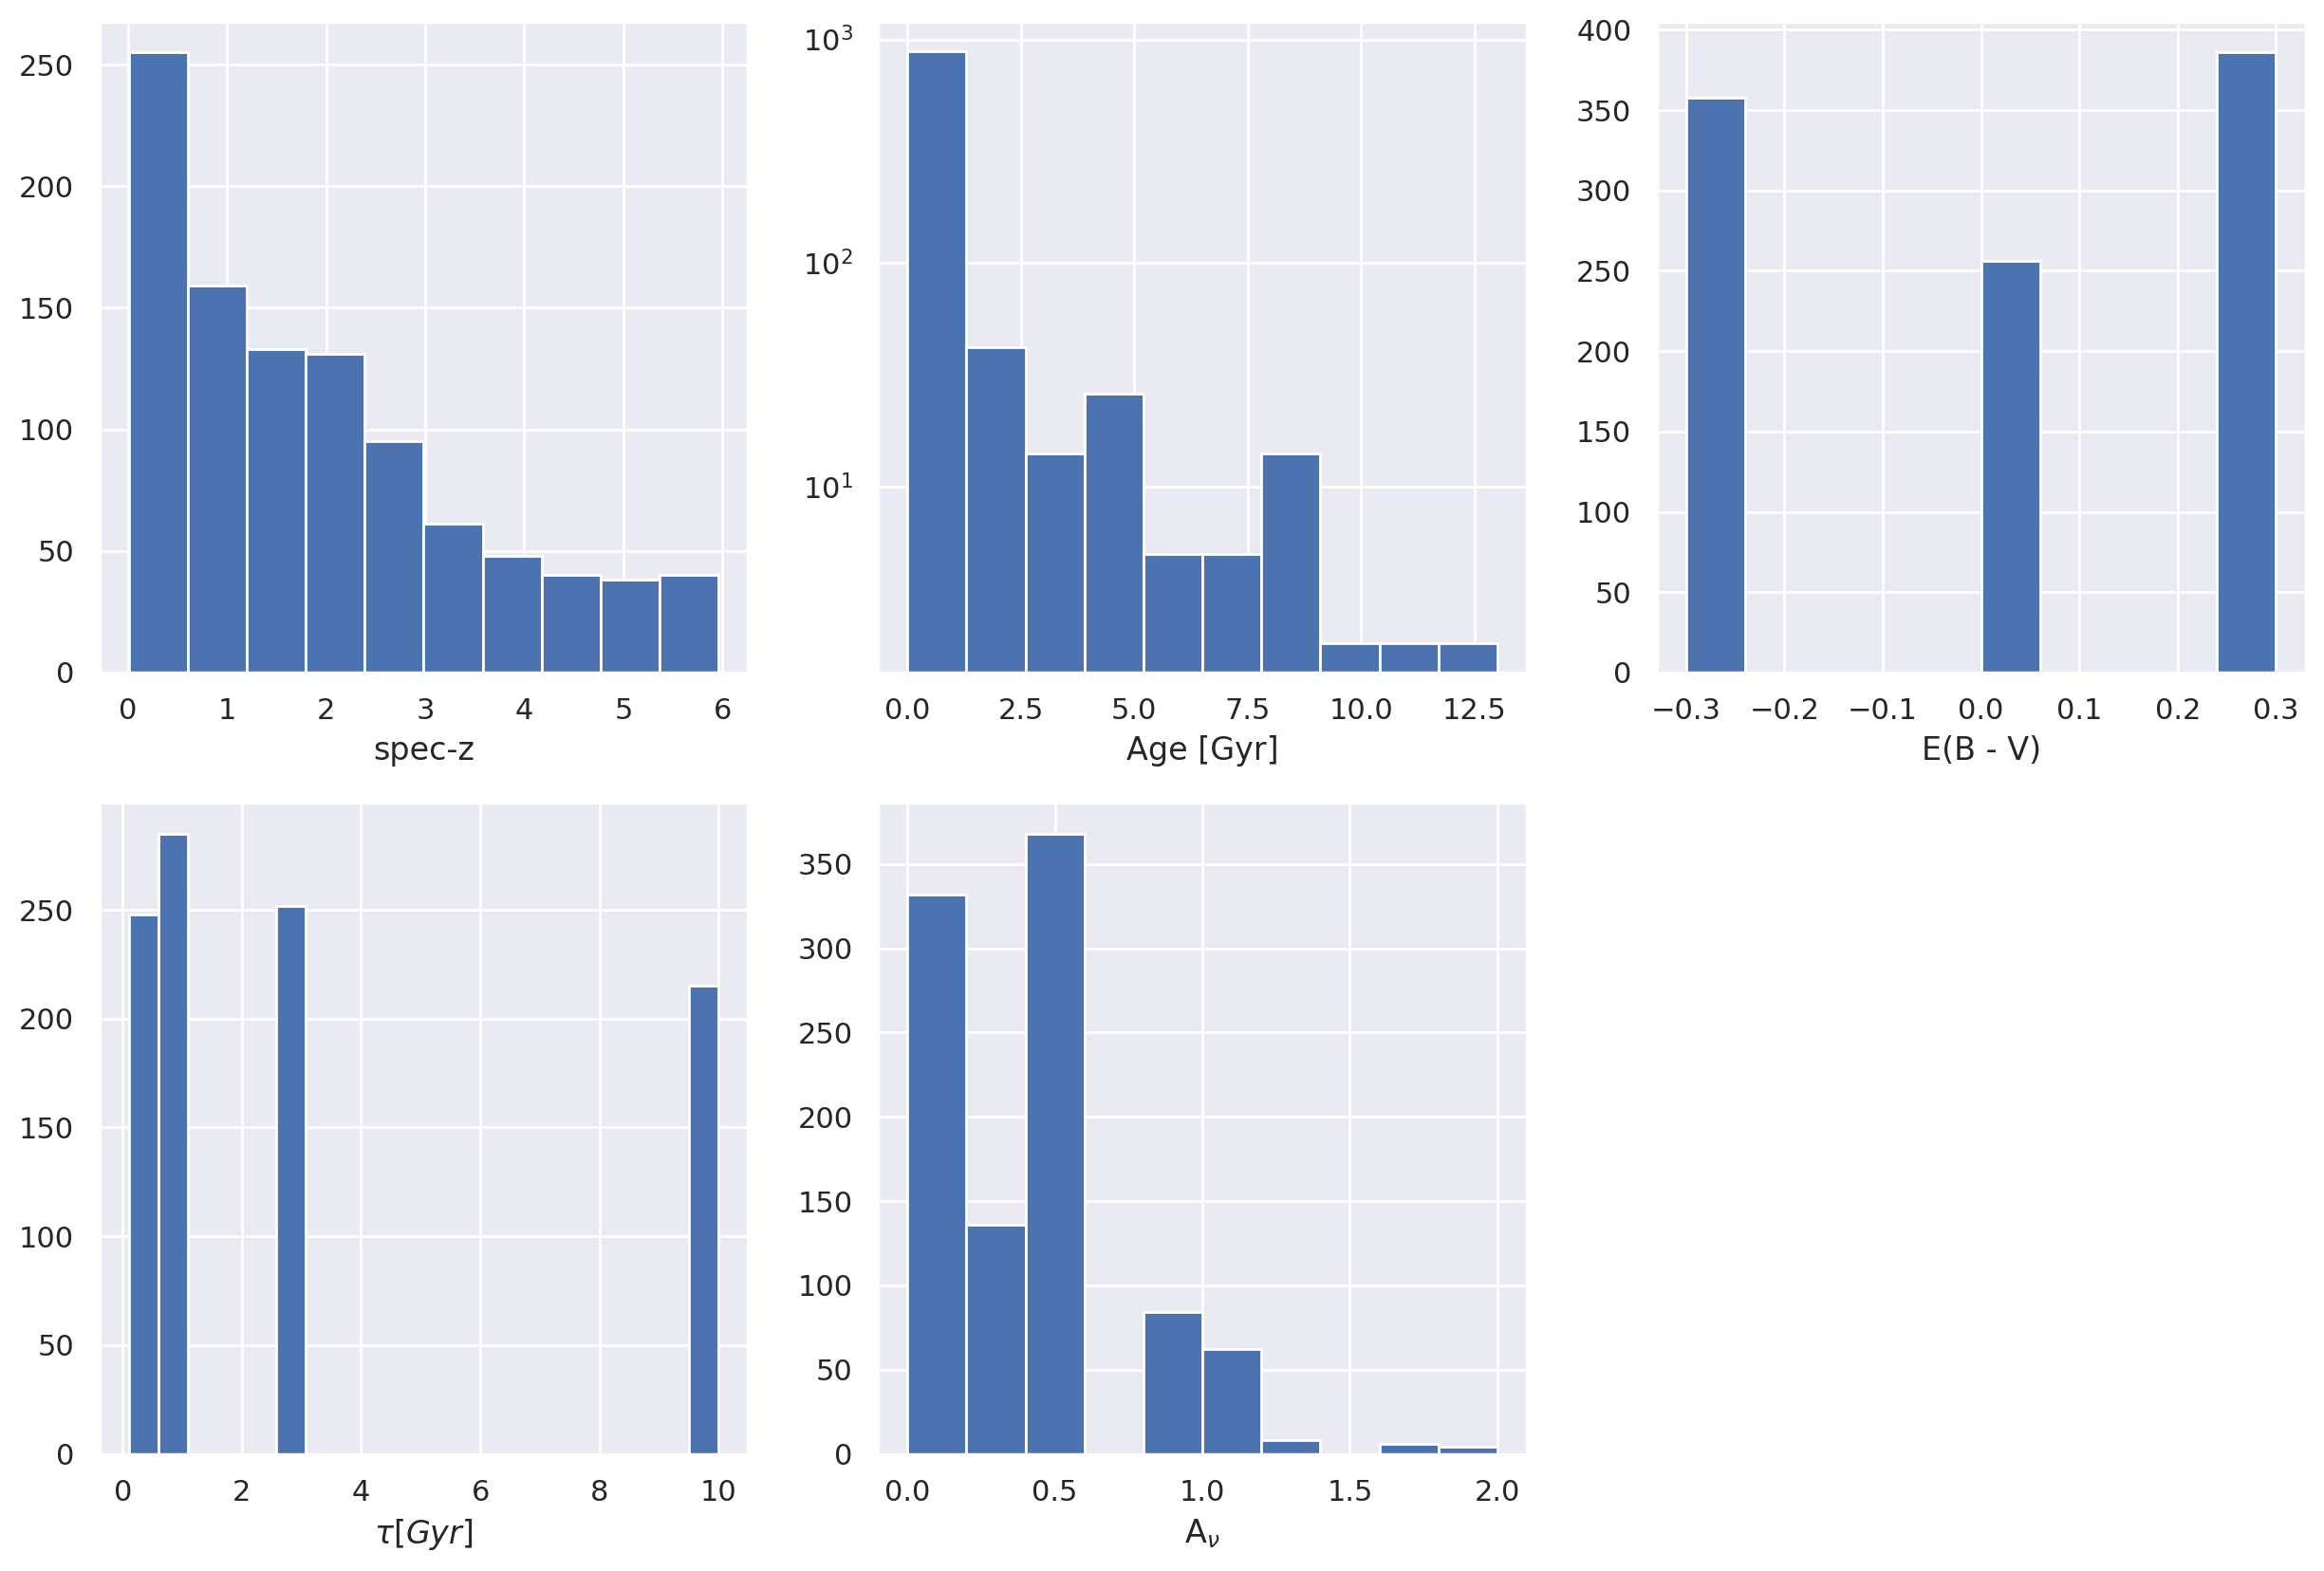

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(231)
obs_df['z'].hist()
plt.xlabel('spec-z')
plt.subplot(232)
obs_df['t/Gyr'].hist(log=True)
plt.xlabel('Age [Gyr]')
plt.subplot(233)
obs_df['Z'].hist()
plt.xlabel('E(B - V)')
plt.subplot(234)
obs_df['tau/Gyr'].hist(bins=20)
plt.xlabel(r'$\tau [Gyr]$')
plt.subplot(235)
obs_df['Av'].hist()
plt.xlabel(r'A$_{\nu}$')

#plt.savefig('mock_props.png', format='png')
plt.show()

#### Age

(0.001, 14)

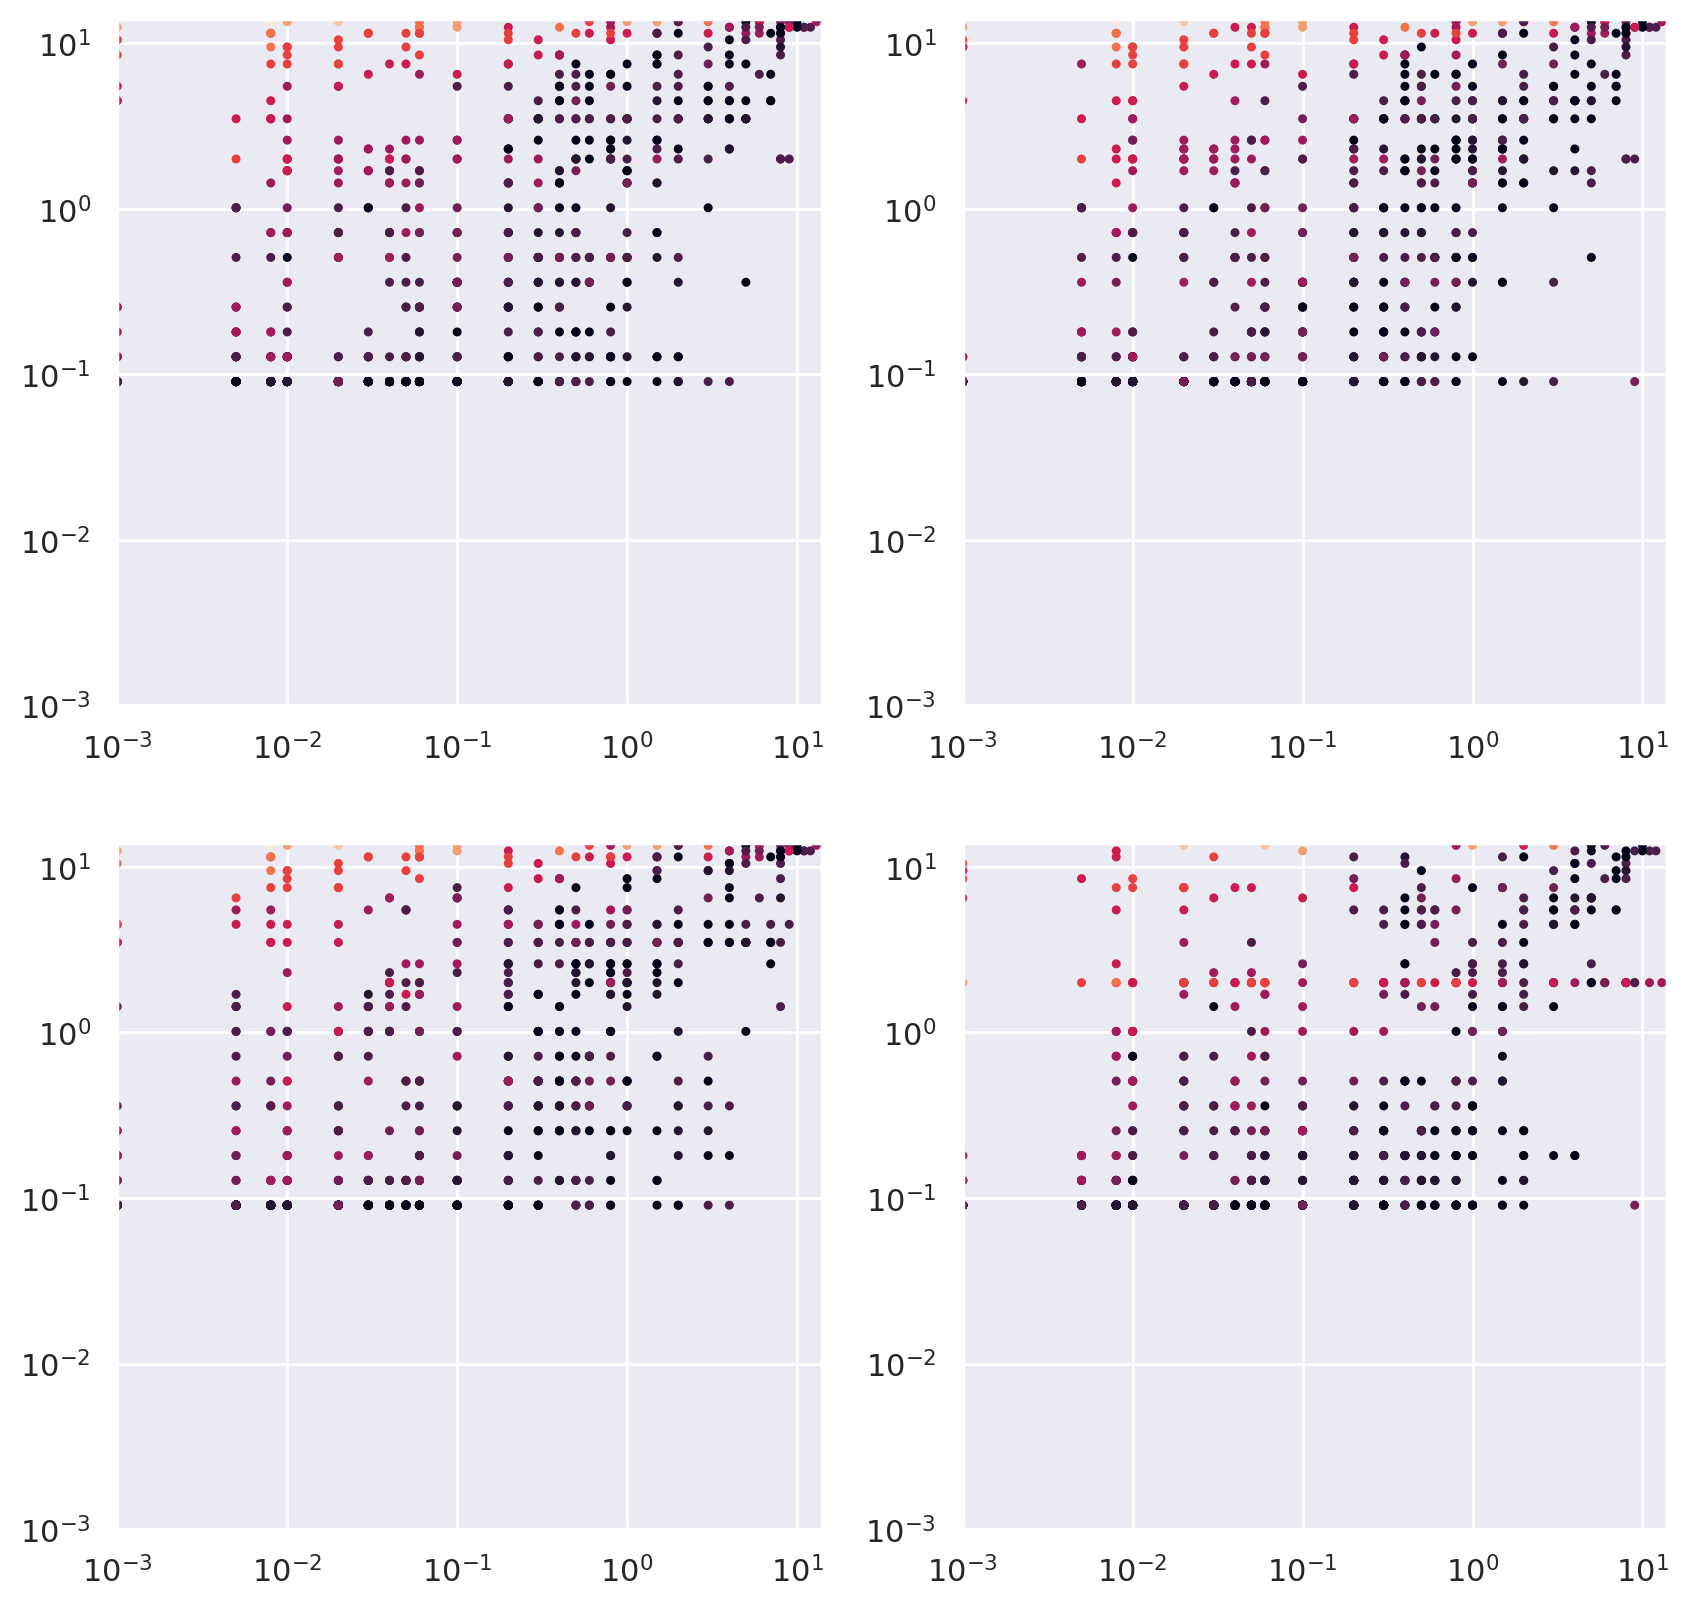

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(obs_df['t/Gyr'], all_zmass_df['age[Gyr]'], c=obs_df['Av'], s=5)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.001, 14)
plt.ylim(0.001, 14)
#plt.xlabel('log(M*/Msun)')
plt.subplot(222)
plt.scatter(obs_df['t/Gyr'], nou_zmass_df['age[Gyr]'], c=obs_df['Av'], s=5)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.001, 14)
plt.ylim(0.001, 14)
#plt.xlabel('log(Mgal/Msun)')
plt.subplot(223)
plt.scatter(obs_df['t/Gyr'], gnd_zmass_df['age[Gyr]'],  c=obs_df['Av'], s=5)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.001, 14)
plt.ylim(0.001, 14)
#plt.xlabel('SFR[Msun/yr]')
plt.subplot(224)
plt.scatter(obs_df['t/Gyr'], euc_zmass_df['age[Gyr]'],  c=obs_df['Av'], s=5)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.001, 14)
plt.ylim(0.001, 14)
#plt.xlabel('tau[Gyr]')

In [15]:
all_age_diff = (all_zmass_df['age[Gyr]']- obs_df['t/Gyr'])#/(1 + obs_df['t/Gyr'])
nou_age_diff = (nou_zmass_df['age[Gyr]']- obs_df['t/Gyr'])#/(1 + obs_df['t/Gyr'])
gnd_age_diff = (gnd_zmass_df['age[Gyr]']- obs_df['t/Gyr'])#/(1 + obs_df['t/Gyr'])
euc_age_diff = (euc_zmass_df['age[Gyr]']- obs_df['t/Gyr'])#/(1 + obs_df['t/Gyr'])

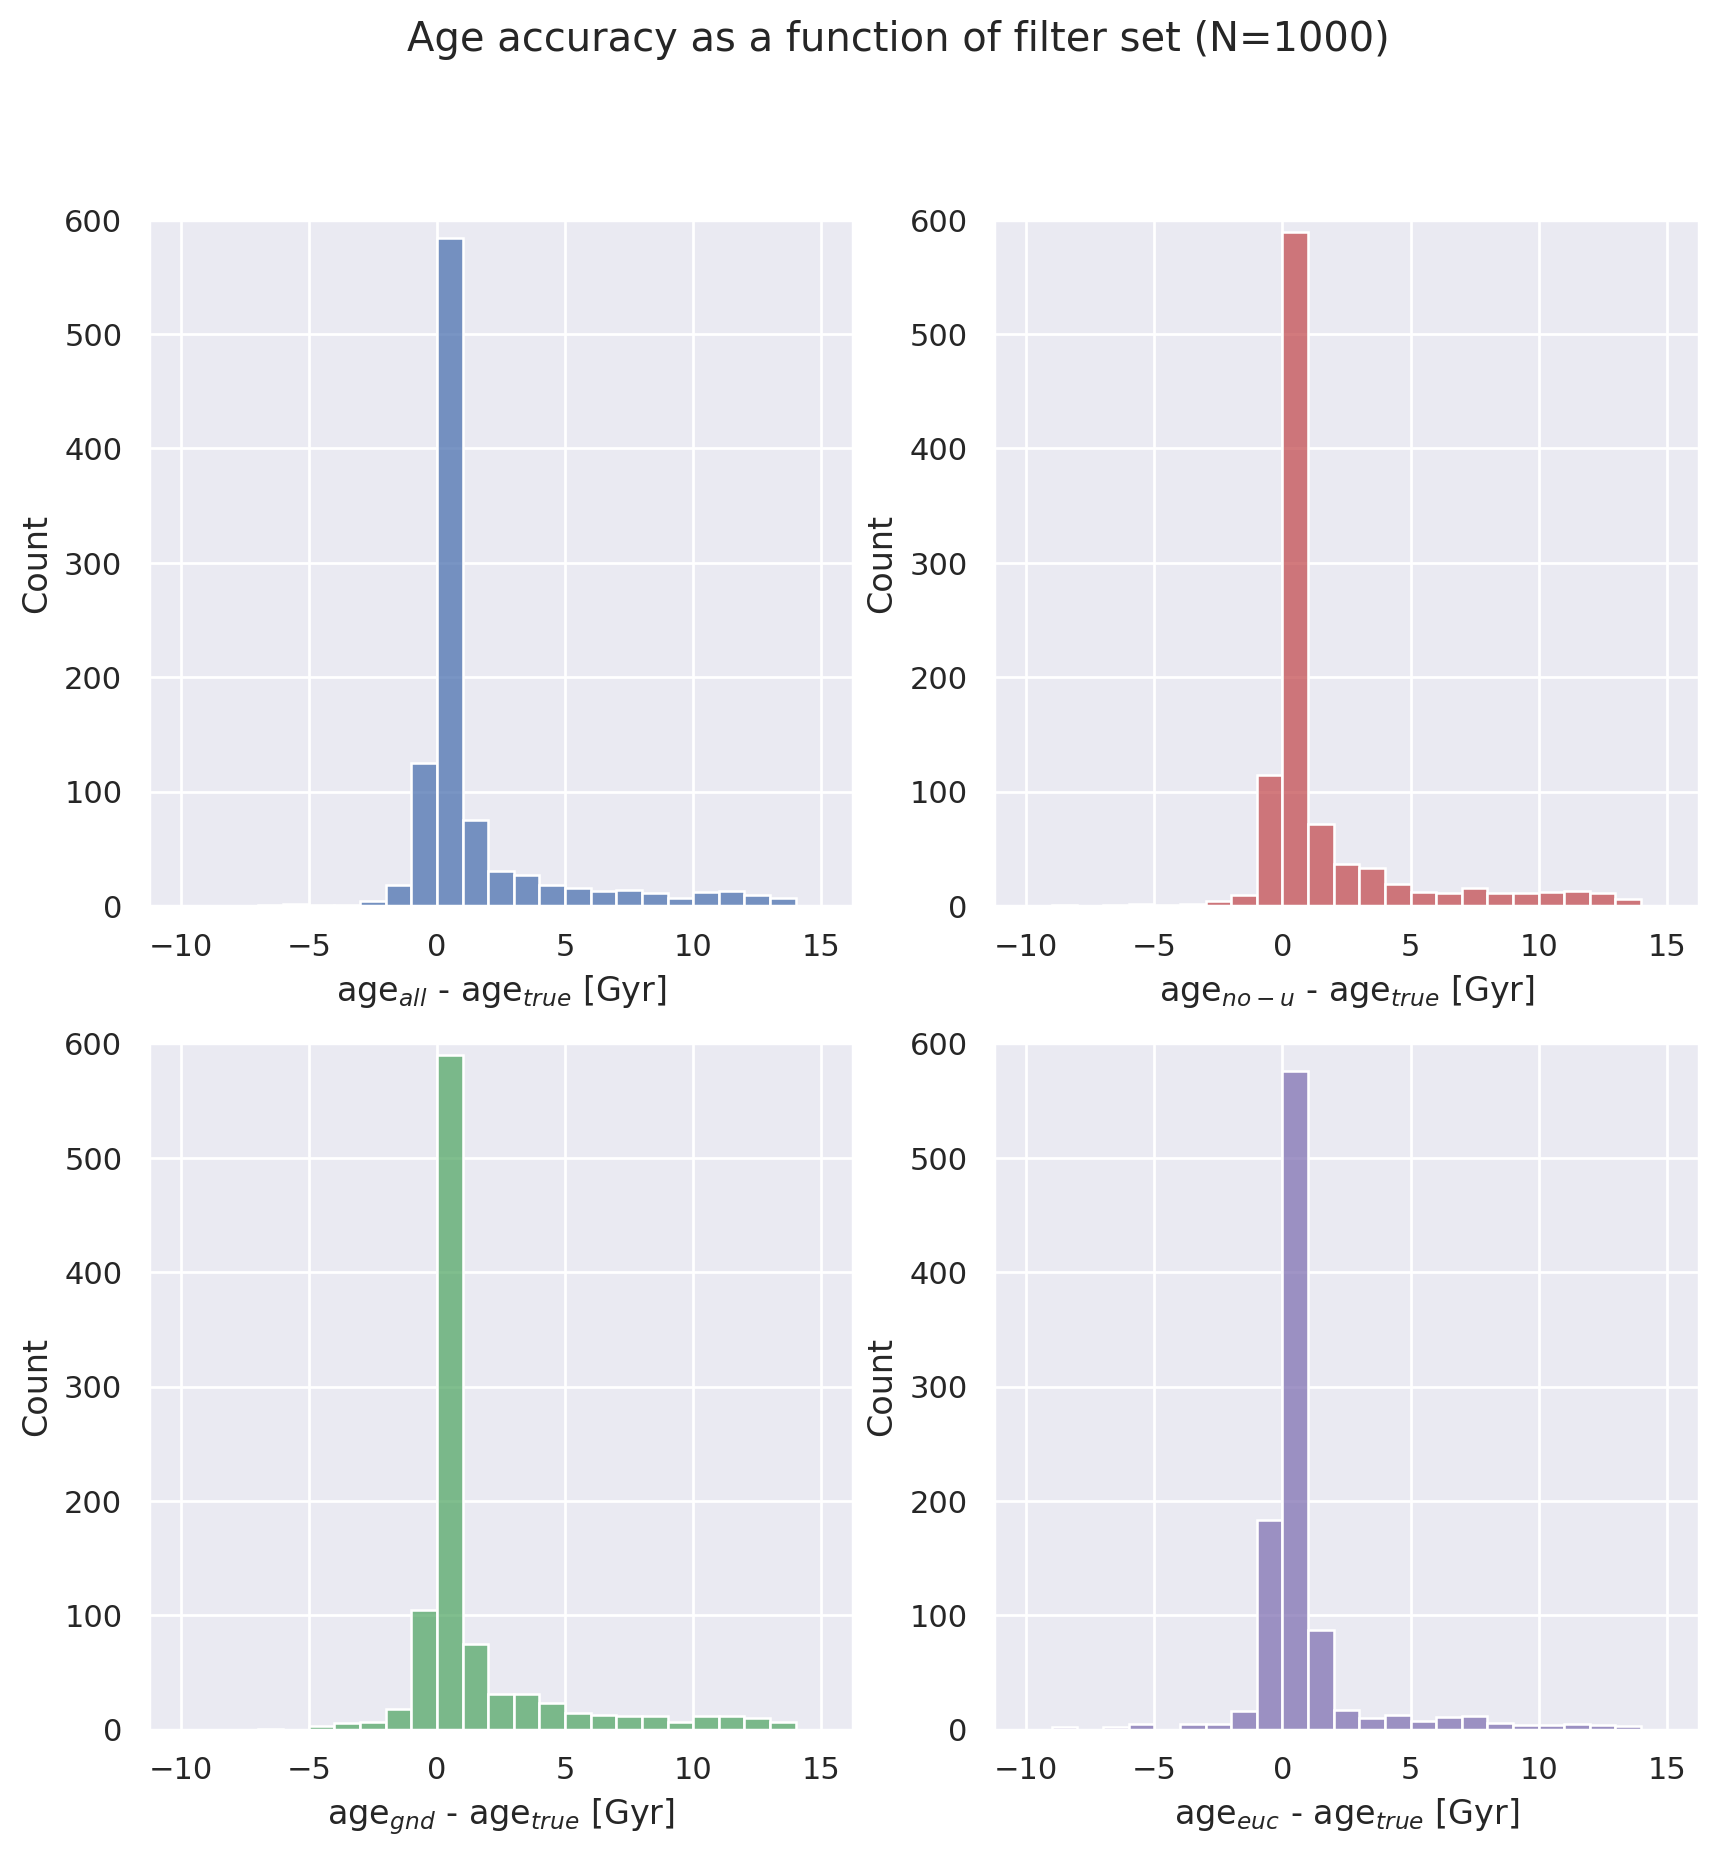

In [16]:
plt.figure(figsize=(10,10))
plt.suptitle('Age accuracy as a function of filter set (N=1000)')
plt.subplot(221)
sns.histplot(all_age_diff, binwidth=1, binrange=(-10, 15))
plt.xlabel(r'age$_{all}$ - age$_{true}$ [Gyr]')
plt.ylim(0, 600)

plt.subplot(222)
sns.histplot(nou_age_diff, binwidth=1, binrange=(-10, 15), color='r')
plt.xlabel(r'age$_{no-u}$ - age$_{true}$ [Gyr]')
plt.ylim(0, 600)

plt.subplot(223)
sns.histplot(gnd_age_diff, binwidth=1, binrange=(-10, 15), color='g')
plt.xlabel(r'age$_{gnd}$ - age$_{true}$ [Gyr]')
plt.ylim(0, 600)

plt.subplot(224)
sns.histplot(euc_age_diff, binwidth=1, binrange=(-10, 15), color='m')
plt.xlabel(r'age$_{euc}$ - age$_{true}$ [Gyr]')
plt.ylim(0, 600)

plt.show()

(0.0, 0.5)

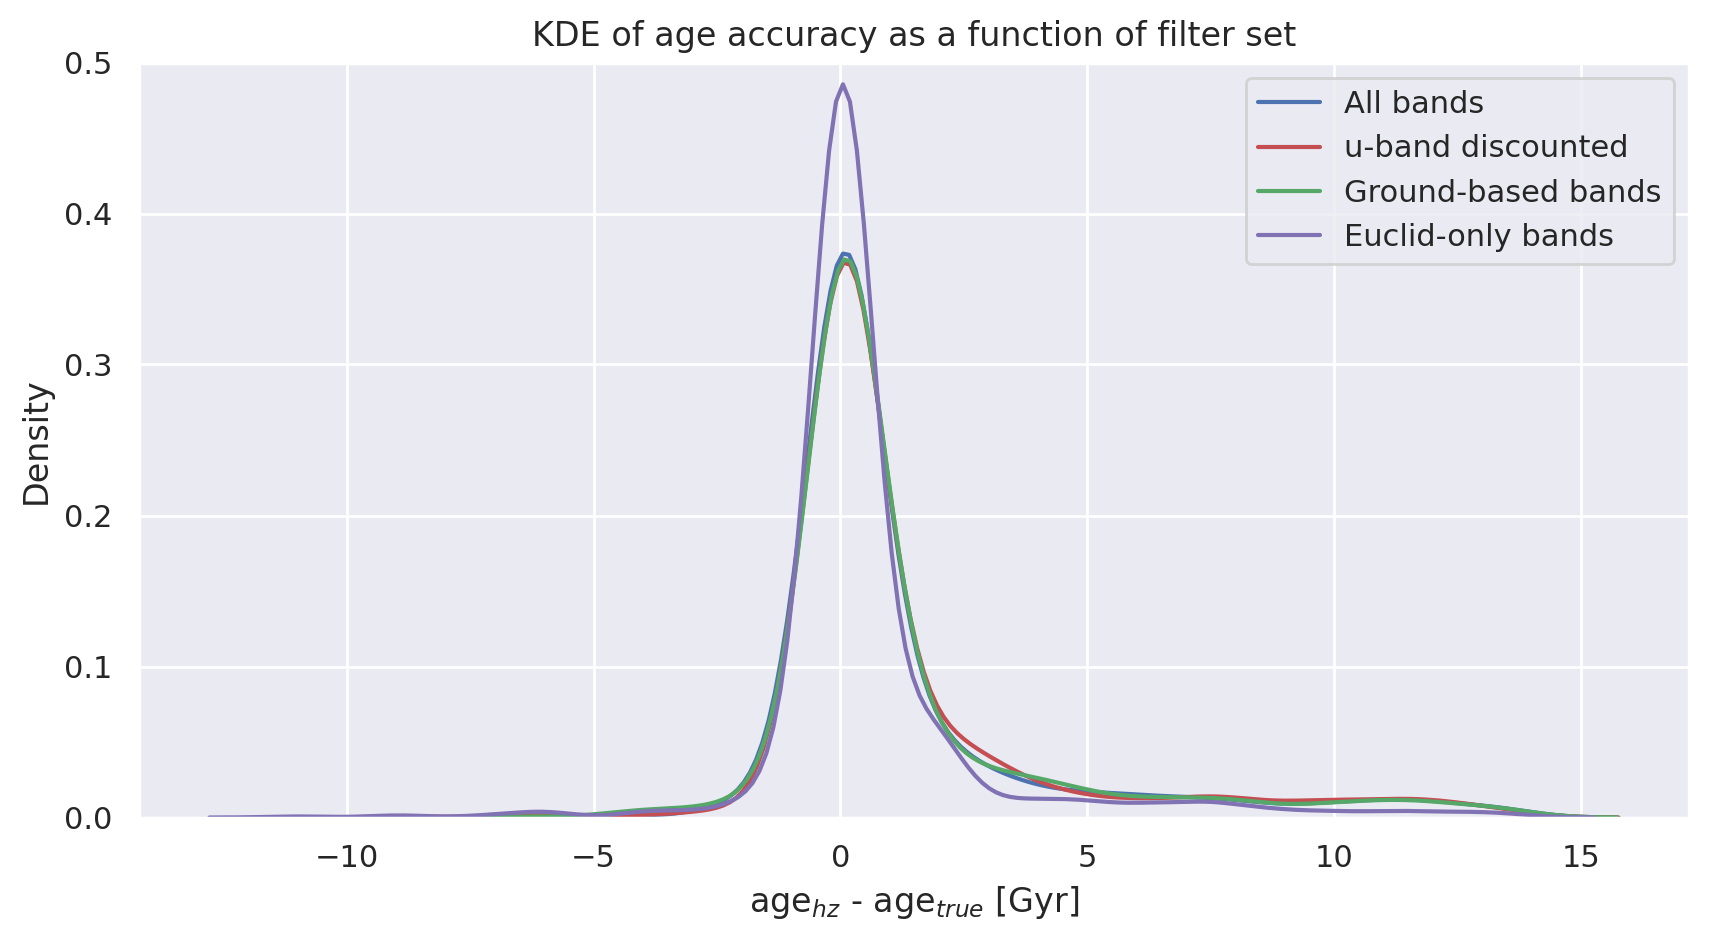

In [17]:
plt.figure(figsize=(10,5))
plt.title('KDE of age accuracy as a function of filter set')
sns.kdeplot(all_age_diff, label='All bands')
sns.kdeplot(nou_age_diff, color='r', label='u-band discounted')
sns.kdeplot(gnd_age_diff, color='g', label='Ground-based bands')
sns.kdeplot(euc_age_diff, color='m', label='Euclid-only bands')
plt.legend()
plt.xlabel(r'age$_{hz}$ - age$_{true}$ [Gyr]')
plt.ylim(0, 0.5)

#plt.savefig('KDE_age.png', format='png')

In [18]:
sum((abs(all_age_diff) < 0.1))

474

In [19]:
sum((abs(nou_age_diff) < 0.1))

479

In [20]:
sum((abs(gnd_age_diff) < 0.1))

470

In [21]:
sum((abs(euc_age_diff) < 0.1))

478

#### Reddening

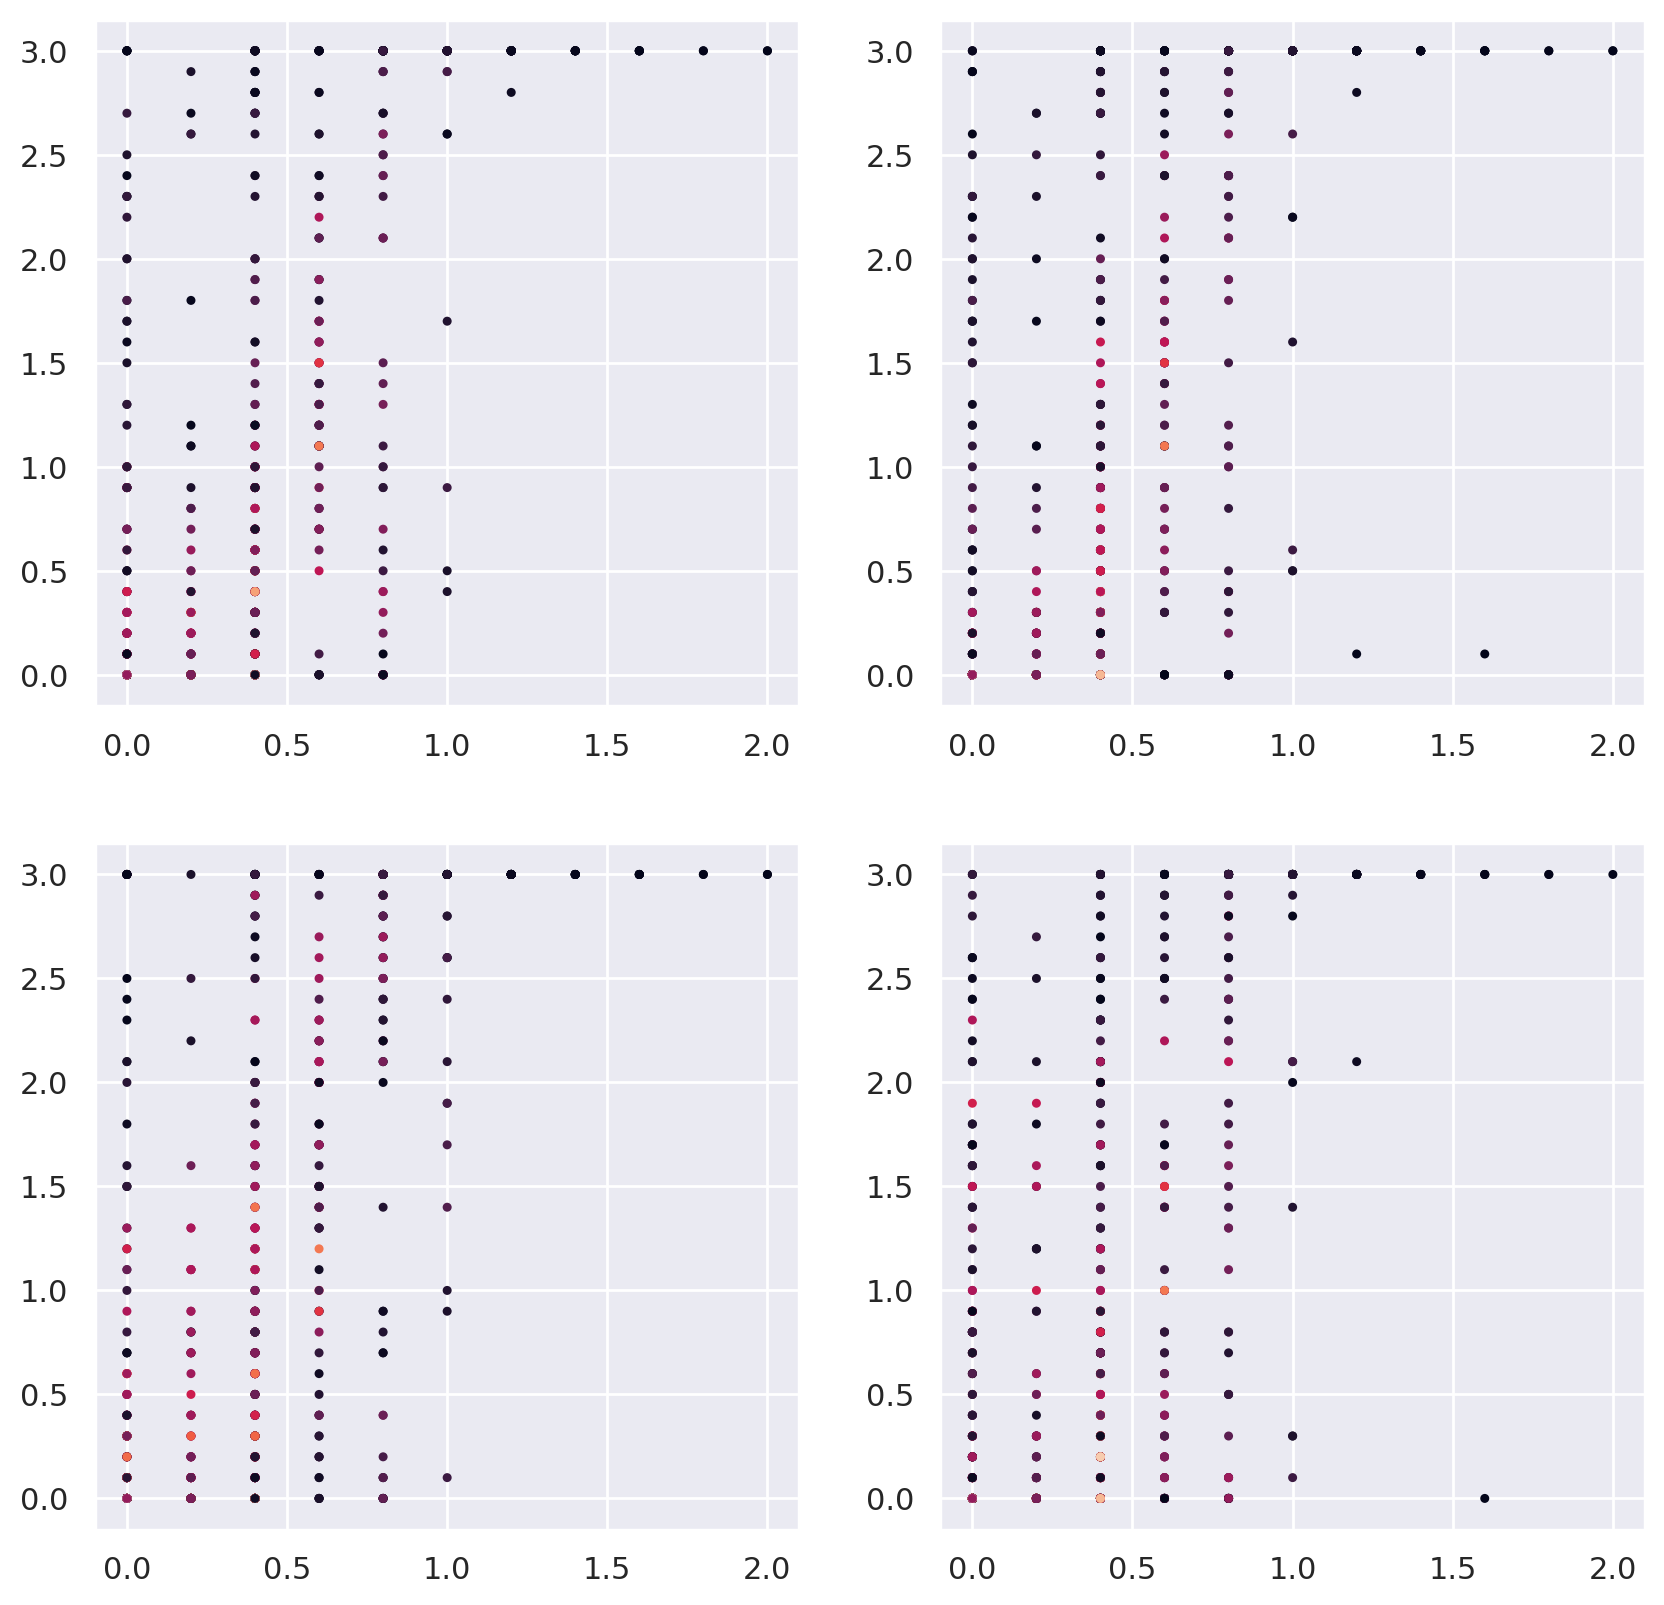

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(obs_df['Av'], all_zmass_df['A_V'], c=obs_df['z'], s=5)
#plt.xscale('log')
#plt.yscale('log')

#plt.xlabel('log(M*/Msun)')
plt.subplot(222)
plt.scatter(obs_df['Av'], nou_zmass_df['A_V'], c=obs_df['z'], s=5)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlabel('log(Mgal/Msun)')
plt.subplot(223)
plt.scatter(obs_df['Av'], gnd_zmass_df['A_V'],  c=obs_df['z'], s=5)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlabel('SFR[Msun/yr]')
plt.subplot(224)
plt.scatter(obs_df['Av'], euc_zmass_df['A_V'],  c=obs_df['z'], s=5)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlabel('tau[Gyr]')

Text(0.5, 1.0, 'Model A$_{\\nu}$')

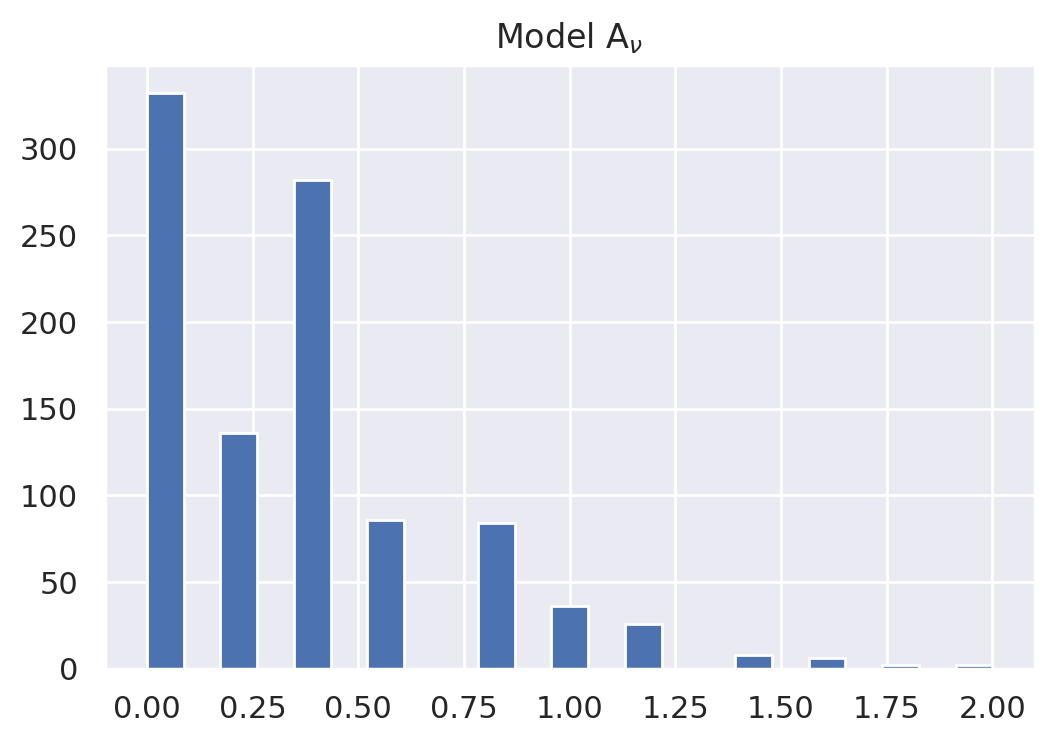

In [23]:
obs_df['Av'].hist(bins='fd')
plt.title(r'Model A$_{\nu}$')

In [24]:
all_Av_diff = (all_zmass_df['A_V']- obs_df['Av'])
nou_Av_diff = (nou_zmass_df['A_V']- obs_df['Av'])
gnd_Av_diff = (gnd_zmass_df['A_V']- obs_df['Av'])
euc_Av_diff = (euc_zmass_df['A_V']- obs_df['Av'])

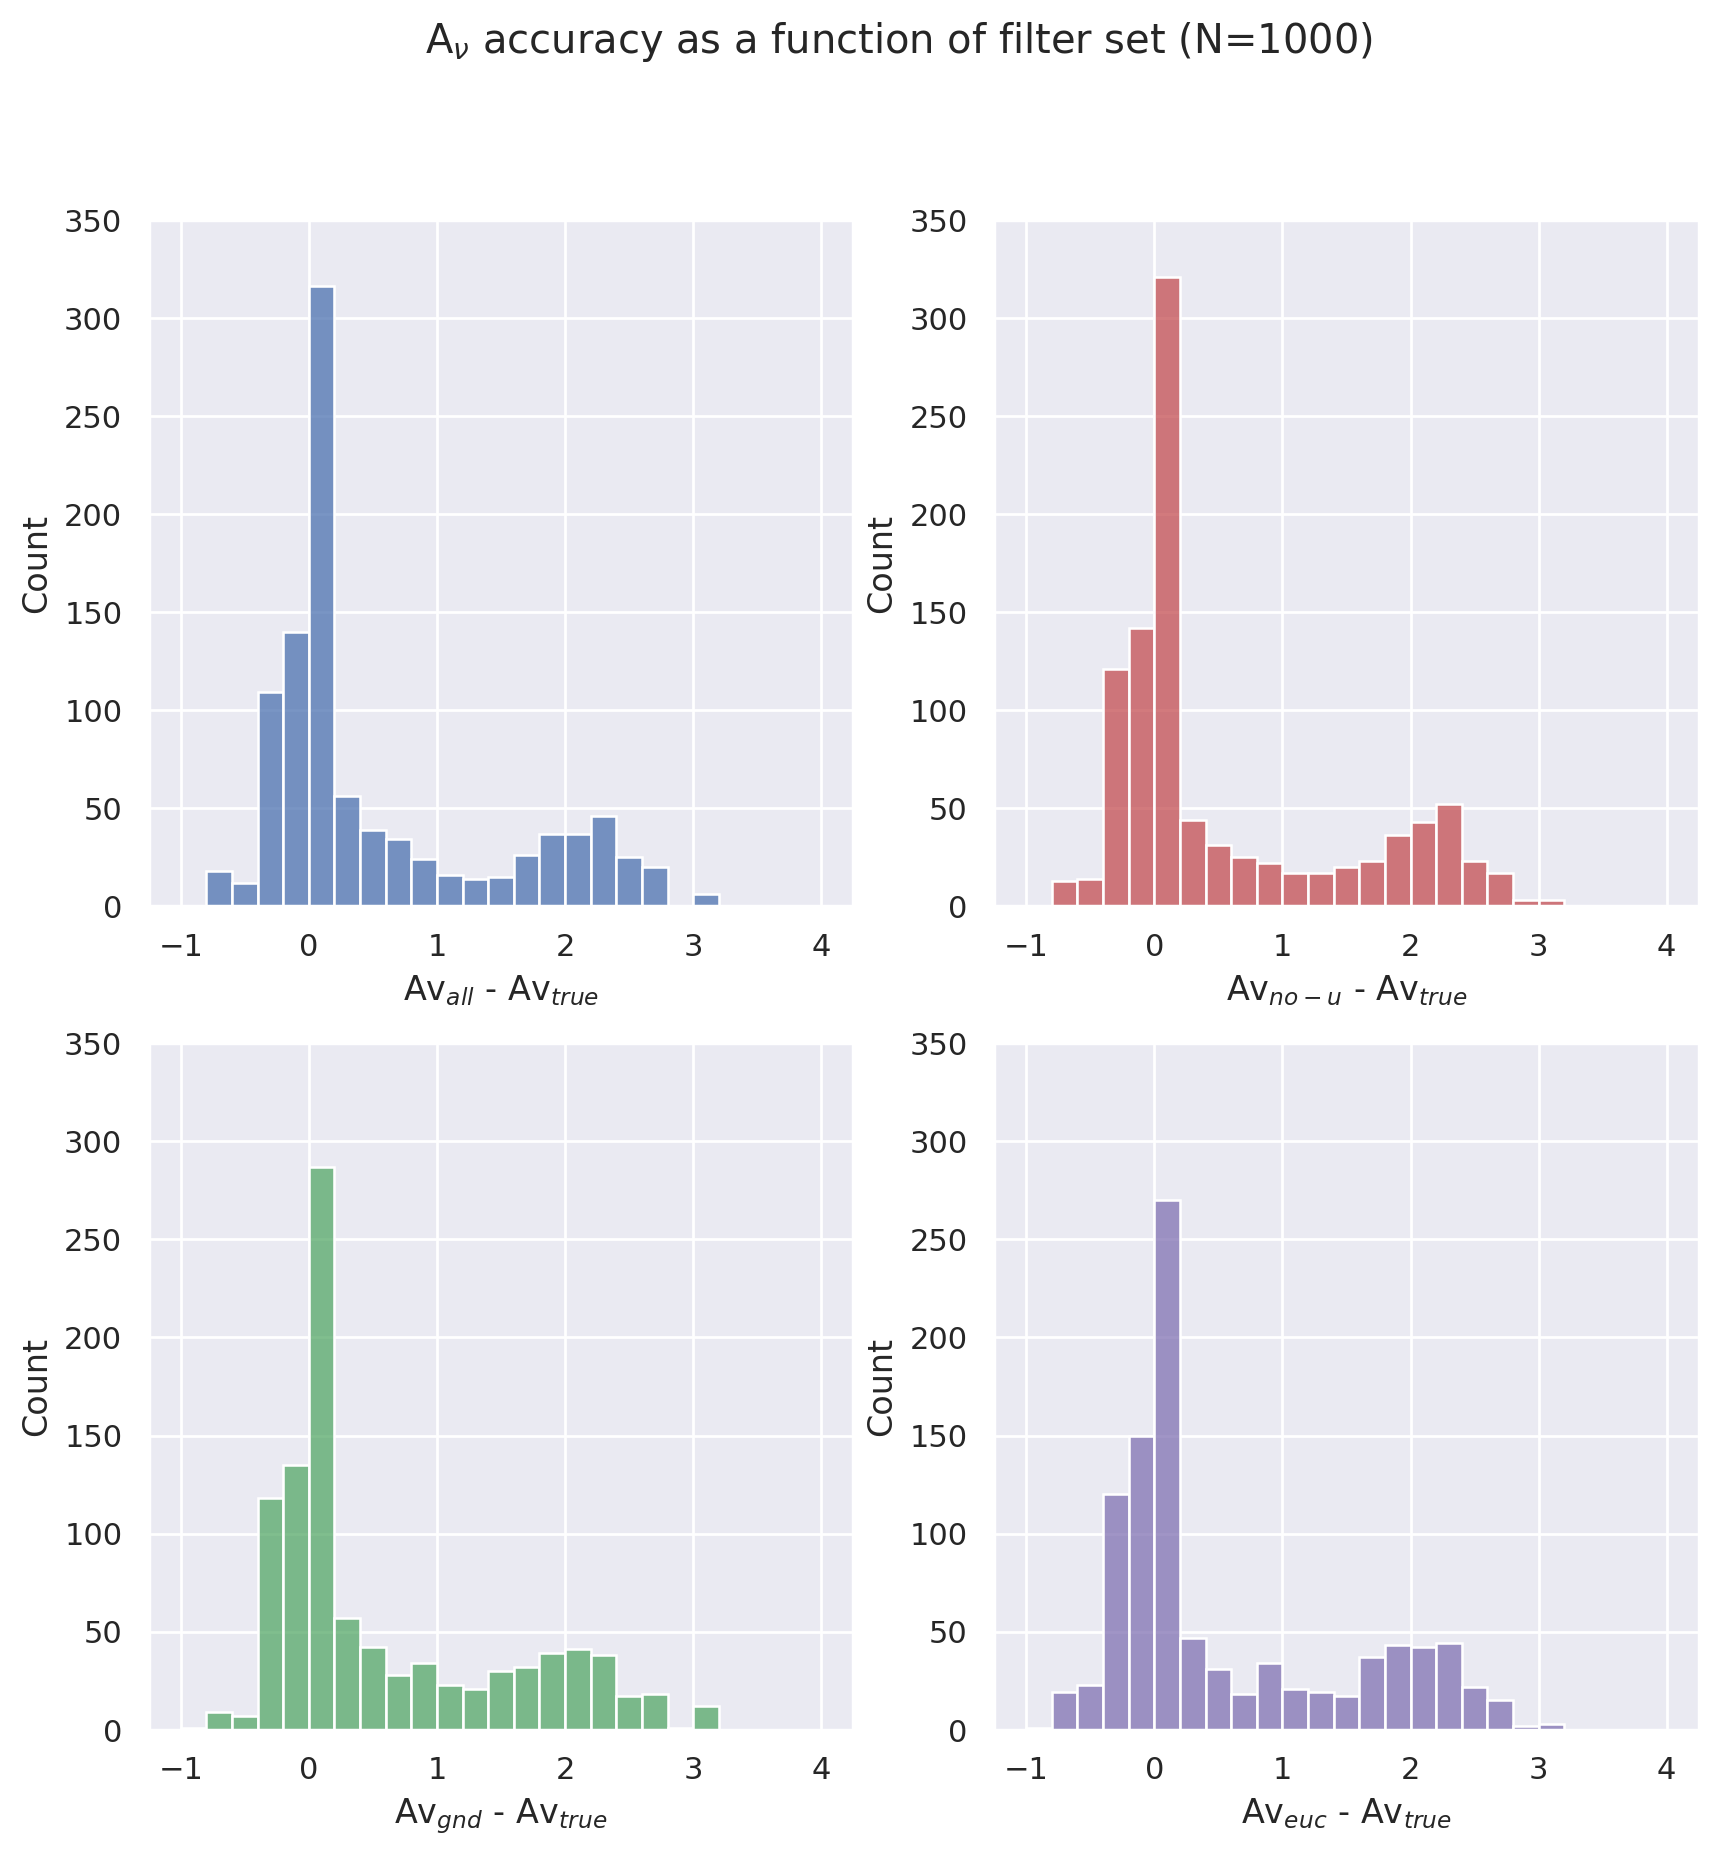

In [25]:
plt.figure(figsize=(10,10))
plt.suptitle(r'A$_{\nu}$ accuracy as a function of filter set (N=1000)')
plt.subplot(221)
sns.histplot(all_Av_diff, binwidth=0.2, binrange=(-1, 4))
plt.xlabel(r'Av$_{all}$ - Av$_{true}$')
plt.ylim(0, 350)

plt.subplot(222)
sns.histplot(nou_Av_diff, binwidth=0.2, binrange=(-1, 4), color='r')
plt.xlabel(r'Av$_{no-u}$ - Av$_{true}$')
plt.ylim(0, 350)

plt.subplot(223)
sns.histplot(gnd_Av_diff, binwidth=0.2, binrange=(-1, 4), color='g')
plt.xlabel(r'Av$_{gnd}$ - Av$_{true}$')
plt.ylim(0, 350)

plt.subplot(224)
sns.histplot(euc_Av_diff, binwidth=0.2, binrange=(-1, 4), color='m')
plt.xlabel(r'Av$_{euc}$ - Av$_{true}$')
plt.ylim(0, 350)

plt.show()

Text(0.5, 0, 'A$\\nu_{hz}$ - A$\\nu_{true}$')

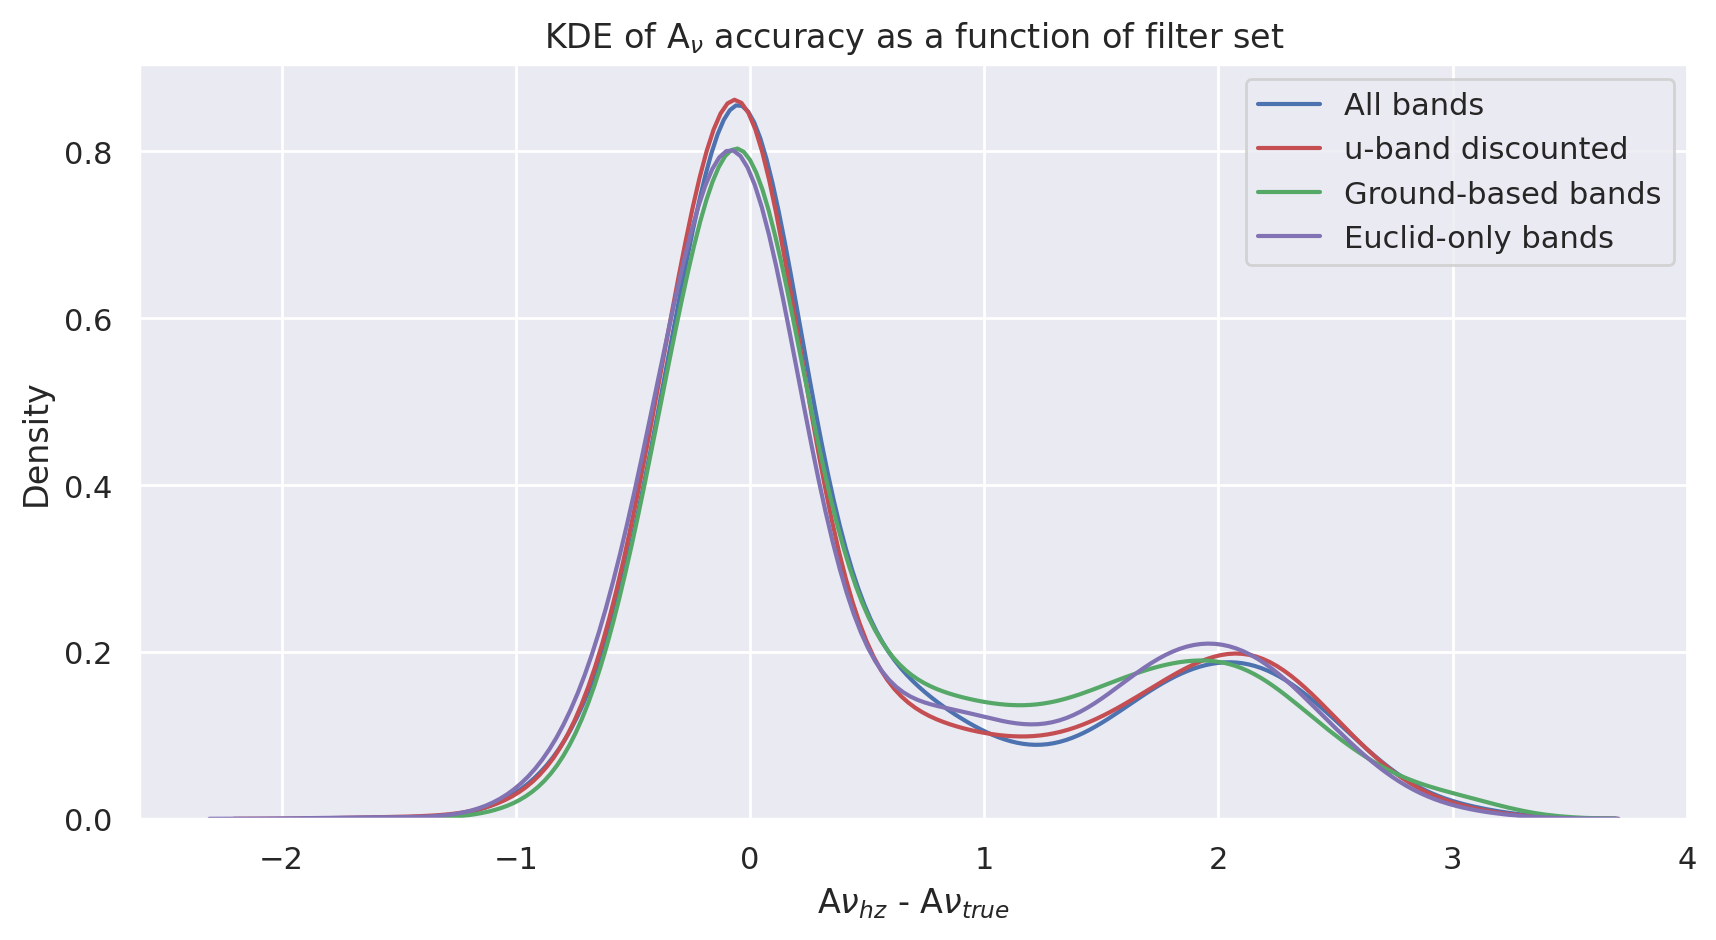

In [26]:
plt.figure(figsize=(10,5))
plt.title(r'KDE of A$_{\nu}$ accuracy as a function of filter set')
sns.kdeplot(all_Av_diff, label='All bands')
sns.kdeplot(nou_Av_diff, color='r', label='u-band discounted')
sns.kdeplot(gnd_Av_diff, color='g', label='Ground-based bands')
sns.kdeplot(euc_Av_diff, color='m', label='Euclid-only bands')
plt.legend()
plt.xlabel(r'A$\nu_{hz}$ - A$\nu_{true}$')
#plt.ylim(0, 0.5)

#plt.savefig('KDE_Av.png', format='png')

In [27]:
sum((abs(all_Av_diff) < 0.2))

369

In [28]:
sum((abs(nou_Av_diff) < 0.2))

369

In [29]:
sum((abs(gnd_Av_diff) < 0.2))

336

In [30]:
sum((abs(euc_Av_diff) < 0.2))

314

#### SFH & Z

In [32]:
all_tau_diff = (all_zmass_df['tau[Gyr]']- obs_df['tau/Gyr'])
nou_tau_diff = (nou_zmass_df['tau[Gyr]']- obs_df['tau/Gyr'])
gnd_tau_diff = (gnd_zmass_df['tau[Gyr]']- obs_df['tau/Gyr'])
euc_tau_diff = (euc_zmass_df['tau[Gyr]']- obs_df['tau/Gyr'])

In [33]:
all_tau_diff[all_zmass_df['tau[Gyr]'] > 0]

ID
1      9.0
2      9.0
3     -0.9
4      9.9
6      9.9
      ... 
992    9.0
994   -9.0
996    7.0
998    0.9
999   -2.7
Length: 555, dtype: float64

Text(0.5, 0, '$\\tau_{hz}$ - $\\tau_{true}$ [Gyr]')

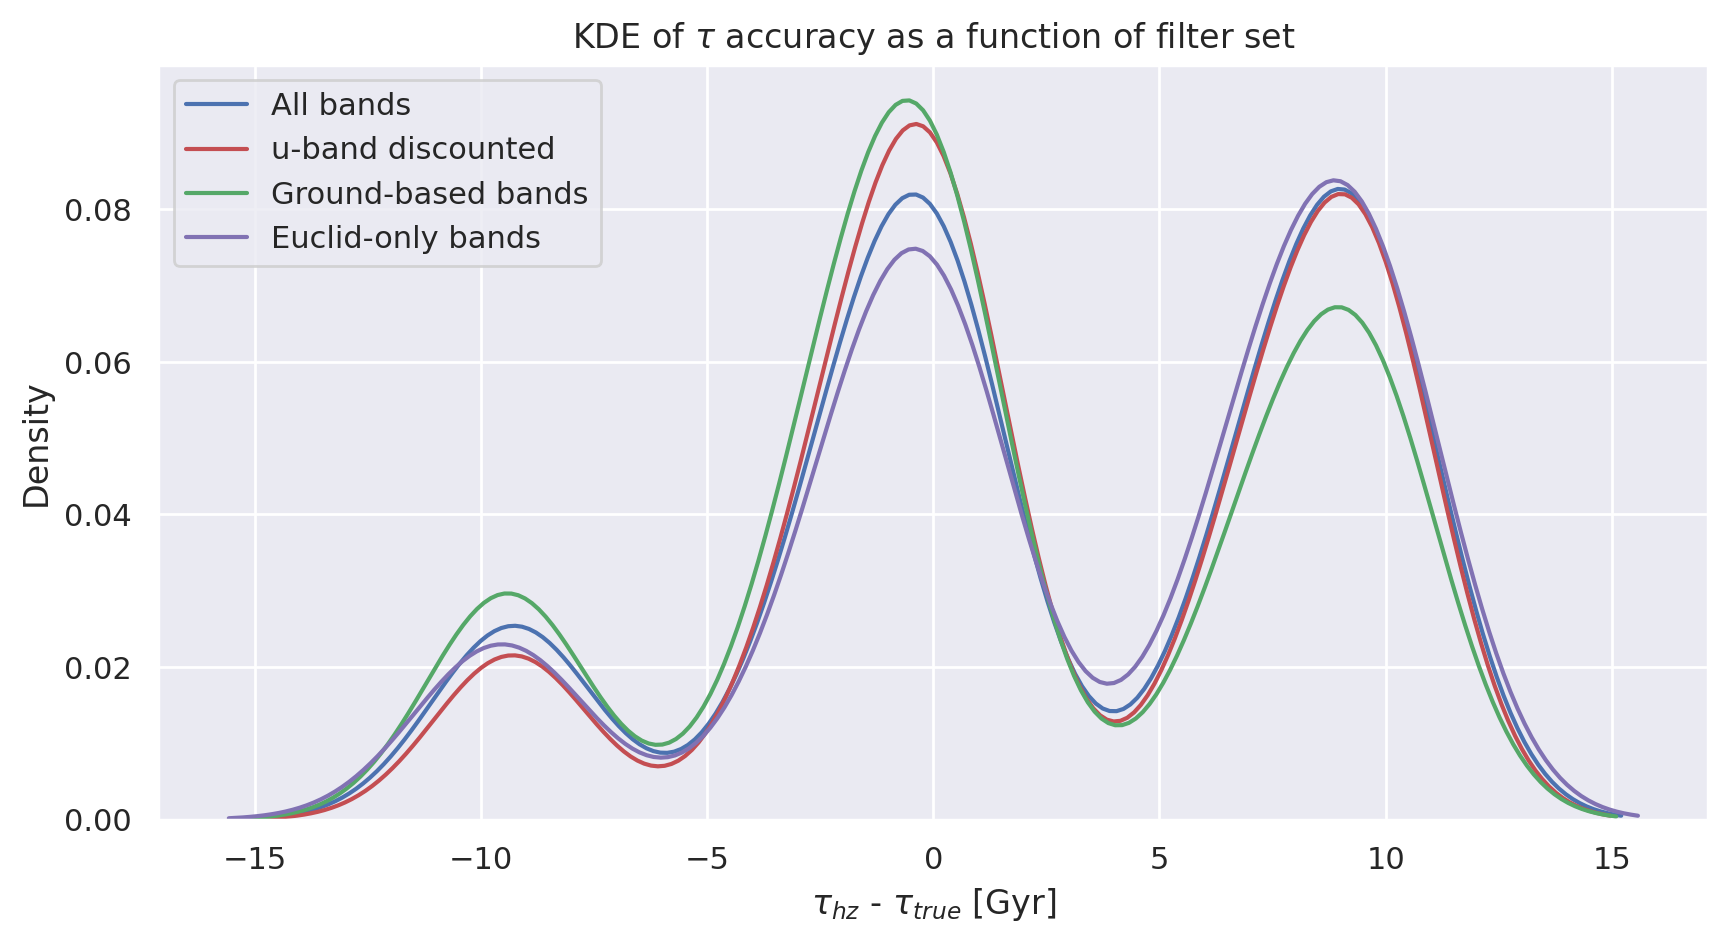

In [47]:
plt.figure(figsize=(10,5))
plt.title(r'KDE of $\tau$ accuracy as a function of filter set')
sns.kdeplot(all_tau_diff[all_zmass_df['tau[Gyr]'] > 0], label='All bands')
sns.kdeplot(nou_tau_diff[nou_zmass_df['tau[Gyr]'] > 0], color='r', label='u-band discounted')
sns.kdeplot(gnd_tau_diff[gnd_zmass_df['tau[Gyr]'] > 0], color='g', label='Ground-based bands')
sns.kdeplot(euc_tau_diff[euc_zmass_df['tau[Gyr]'] > 0], color='m', label='Euclid-only bands')
plt.legend()
plt.xlabel(r'$\tau_{hz}$ - $\tau_{true}$ [Gyr]')
#plt.ylim(0, 0.5)

#plt.savefig('KDE_Av.png', format='png')

In [44]:
SFM_acc_all = len(all_tau_diff[all_zmass_df['tau[Gyr]'] > 0].index)/10
SFM_acc_nou = len(nou_tau_diff[nou_zmass_df['tau[Gyr]'] > 0].index)/10
SFM_acc_gnd = len(gnd_tau_diff[gnd_zmass_df['tau[Gyr]'] > 0].index)/10
SFM_acc_euc = len(euc_tau_diff[euc_zmass_df['tau[Gyr]'] > 0].index)/10

SFM_match_all = len(all_tau_diff[all_zmass_df['tau[Gyr]'] == 0].index)/10
SFM_match_nou = len(nou_tau_diff[nou_zmass_df['tau[Gyr]'] == 0].index)/10
SFM_match_gnd = len(gnd_tau_diff[gnd_zmass_df['tau[Gyr]'] == 0].index)/10
SFM_match_euc = len(euc_tau_diff[euc_zmass_df['tau[Gyr]'] == 0].index)/10

#### Create Z column for each df (and save!)

In [5]:
# lookup dict based on iSED column
SFH_Zdict = {1: [-1.0, -0.3],
             2: [-1., 0],
             3: [-1., .3],
             4: [0, -.3],
             5: [0, 0],
             6: [0, 0.3],
             7: [0.1, -1.3],
             8: [0.1, -.3],
             9: [0.1, 0],
             10: [0.1, .3],
             11: [0.3, -1.3],
             12: [0.3, -.3],
             13: [0.3, 0],
             14: [0.3, .3],
             15: [1., -1.3],
             16: [1., -.3],
             17: [1., 0],
             18: [1., .3],
             19: [10., -1.3],
             20: [10., -.3],
             21: [10., 0],
             22: [10., .3],
             23: [-10., -.3],
             24: [-10., 0],
             25: [-10., .3],
             26: [-10., -.3],
             27: [-10., 0],
             28: [-10., .3],
             29: [-10., -.3],
             30: [-10., 0],
             31: [-10., .3],
             -99: [np.nan, np.nan]}

In [6]:
iSED_arr = all_zmass_df['iSED'].values.copy()

In [7]:
iSED_arr[np.isnan(iSED_arr)] = -99

In [8]:
Z = []
for i in iSED_arr:
    Z.append(SFH_Zdict[i][1])

In [9]:
all_zmass_df['Z/H'] = Z

In [10]:
all_zmass_df

,redshift,chi2,P_chi2,iSED,iage,age[Gyr],A_V,norm,log(Mgal/Msun),log(M*/Msun),...,logM*(99)up,logM*(90)low,logM*(90)up,logM*(68)low,logM*(68)up,SFR[Msun/yr],tau[Gyr],Nfilt,D_L[Mpc],Z/H
ID,,,,,,,,,,,,,,,,,,,,,
1,4.77,25.248,0.0,19.0,22.0,0.0905,0.0,1.352500e-13,10.870871,10.818779,...,10.830603,10.818779,10.830603,10.818779,10.823511,817.25900,10.0,9.0,44156.437,-1.3
2,0.69,9999.999,0.0,19.0,22.0,0.0905,0.0,1.516700e-08,13.874836,13.822744,...,13.822745,13.822743,13.822744,13.822744,13.822744,824754.00000,10.0,9.0,4188.814,-1.3
3,2.39,1.662,10.2,7.0,26.0,0.3602,0.8,9.215400e-16,10.019764,9.929675,...,10.831530,9.541567,10.620827,9.788450,10.455186,2.93379,0.1,9.0,19321.638,-1.3
4,4.86,66.616,0.0,19.0,22.0,0.0905,0.0,7.430200e-13,11.629824,11.577732,...,11.589670,11.577732,11.583987,11.577732,11.580019,4691.51000,10.0,9.0,45137.491,-1.3
5,4.05,33.543,0.0,31.0,22.0,0.0905,0.6,2.654400e-13,11.997831,11.943318,...,11.993523,11.943318,11.958173,11.943318,11.958173,10997.30000,-10.0,9.0,36398.010,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1.85,9999.999,0.0,19.0,22.0,0.0905,0.0,2.284800e-10,13.108977,13.056885,...,13.056896,13.056885,13.056889,13.056885,13.056886,141405.00000,10.0,9.0,14131.493,-1.3
997,0.11,9999.999,0.0,6.0,44.0,12.5000,3.0,5.129600e-09,-inf,13.470370,...,13.470370,13.470366,13.470370,13.470368,13.470370,0.00000,0.0,9.0,510.209,0.3
998,0.26,993.417,0.0,18.0,29.0,1.0152,0.0,6.397900e-09,14.346247,14.245050,...,14.245060,14.244900,14.245054,14.244995,14.245052,126113.00000,1.0,9.0,1318.943,0.3


In [11]:
iSED_arr_nou = nou_zmass_df['iSED'].values.copy()

In [12]:
iSED_arr_nou[np.isnan(iSED_arr_nou)] = -99

In [13]:
Z_nou = []
for i in iSED_arr_nou:
    Z_nou.append(SFH_Zdict[i][1])

In [14]:
nou_zmass_df['Z/H'] = Z_nou

In [15]:
nou_zmass_df

,redshift,chi2,P_chi2,iSED,iage,age[Gyr],A_V,norm,log(Mgal/Msun),log(M*/Msun),...,logM*(99)up,logM*(90)low,logM*(90)up,logM*(68)low,logM*(68)up,SFR[Msun/yr],tau[Gyr],Nfilt,D_L[Mpc],Z/H
ID,,,,,,,,,,,,,,,,,,,,,
1,4.77,27.434,0.00,19.0,22.0,0.0905,0.0,1.352500e-13,10.870871,10.818779,...,10.830603,10.818779,10.830603,10.818779,10.823511,817.25900,10.0,8.0,44156.437,-1.3
2,0.69,9999.999,0.00,19.0,22.0,0.0905,0.0,1.480200e-08,13.864258,13.812166,...,13.812169,13.812166,13.812167,13.812166,13.812167,804909.00000,10.0,8.0,4188.814,-1.3
3,2.39,1.558,14.26,16.0,34.0,2.6000,0.3,2.396200e-15,10.413262,10.290112,...,10.774425,9.651034,10.637728,9.894936,10.421297,2.07785,1.0,8.0,19321.638,-0.3
4,4.86,70.051,0.00,19.0,22.0,0.0905,0.0,7.430200e-13,11.629824,11.577732,...,11.589670,11.577732,11.583987,11.577732,11.580019,4691.51000,10.0,8.0,45137.491,-1.3
5,4.05,34.883,0.00,31.0,22.0,0.0905,0.6,2.654400e-13,11.997831,11.943318,...,11.993523,11.943318,11.958173,11.943318,11.958173,10997.30000,-10.0,8.0,36398.010,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1.85,9999.999,0.00,25.0,22.0,0.0905,0.0,2.510800e-12,13.151894,13.097382,...,13.097382,13.097382,13.097382,13.097382,13.097382,156801.00000,-10.0,8.0,14131.493,0.3
997,0.11,9999.999,0.00,6.0,44.0,12.5000,3.0,5.137200e-09,-inf,13.471018,...,13.471018,13.471014,13.471018,13.471017,13.471018,0.00000,0.0,8.0,510.209,0.3
998,0.26,736.230,0.00,14.0,27.0,0.5088,0.2,4.380400e-09,14.289133,14.197568,...,14.197742,14.197563,14.197639,14.197566,14.197594,145695.00000,0.3,8.0,1318.943,0.3


In [16]:
iSED_arr_gnd = gnd_zmass_df['iSED'].values.copy()

In [17]:
iSED_arr_gnd[np.isnan(iSED_arr_gnd)] = -99

In [18]:
Z_gnd = []
for i in iSED_arr_gnd:
    Z_gnd.append(SFH_Zdict[i][1])

In [19]:
gnd_zmass_df['Z/H'] = Z_gnd

In [20]:
gnd_zmass_df

,redshift,chi2,P_chi2,iSED,iage,age[Gyr],A_V,norm,log(Mgal/Msun),log(M*/Msun),...,logM*(99)up,logM*(90)low,logM*(90)up,logM*(68)low,logM*(68)up,SFR[Msun/yr],tau[Gyr],Nfilt,D_L[Mpc],Z/H
ID,,,,,,,,,,,,,,,,,,,,,
1,4.77,29.434,0.00,19.0,22.0,0.0905,0.0,1.427300e-13,10.894257,10.842165,...,10.993191,10.842165,10.886841,10.842165,10.854437,8.624720e+02,10.0,5.0,44156.437,-1.3
2,0.69,9999.999,0.00,31.0,22.0,0.0905,0.0,3.454200e-09,14.234240,14.179728,...,14.179728,14.179728,14.179728,14.179728,14.179728,1.895370e+06,-10.0,5.0,4188.814,0.3
3,2.39,0.856,48.98,14.0,32.0,2.0000,1.3,5.117300e-13,12.775738,12.653056,...,13.401665,9.035052,13.137241,9.540704,12.854148,2.534390e+01,0.3,5.0,19321.638,0.3
4,4.86,120.590,0.00,19.0,22.0,0.0905,0.0,7.566300e-13,11.637708,11.585616,...,11.597634,11.585616,11.594372,11.585616,11.588816,4.777450e+03,10.0,5.0,45137.491,-1.3
5,4.05,11.421,0.00,31.0,22.0,0.0905,0.9,5.713600e-13,12.330777,12.276265,...,14.658631,12.276265,14.658631,12.276265,12.327940,2.367180e+04,-10.0,5.0,36398.010,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1.85,2765.571,0.00,19.0,22.0,0.0905,0.0,2.490000e-10,13.146320,13.094228,...,13.095626,13.094228,13.094798,13.094228,13.094436,1.541020e+05,10.0,5.0,14131.493,-1.3
997,0.11,7835.548,0.00,6.0,44.0,12.5000,3.0,3.644900e-09,-inf,13.321980,...,13.321980,13.321933,13.321980,13.321963,13.321980,0.000000e+00,0.0,5.0,510.209,0.3
998,0.26,306.323,0.00,21.0,32.0,2.0000,0.0,2.580400e-08,14.405634,14.298525,...,14.301370,14.298395,14.299685,14.298477,14.298949,1.149350e+05,10.0,5.0,1318.943,0.0


In [21]:
iSED_arr_euc = euc_zmass_df['iSED'].values.copy()

In [22]:
iSED_arr_euc[np.isnan(iSED_arr_euc)] = -99

In [23]:
Z_euc = []
for i in iSED_arr_euc:
    Z_euc.append(SFH_Zdict[i][1])

In [24]:
euc_zmass_df['Z/H'] = Z_euc

In [25]:
euc_zmass_df

,redshift,chi2,P_chi2,iSED,iage,age[Gyr],A_V,norm,log(Mgal/Msun),log(M*/Msun),...,logM*(99)up,logM*(90)low,logM*(90)up,logM*(68)low,logM*(68)up,SFR[Msun/yr],tau[Gyr],Nfilt,D_L[Mpc],Z/H
ID,,,,,,,,,,,,,,,,,,,,,
1,4.77,26.000,0.00,19.0,22.0,0.0905,0.0,1.315800e-13,10.858930,10.806838,...,10.824707,10.806838,10.818455,10.806838,10.813056,795.094,10.0,4.0,44156.437,-1.3
2,0.69,9999.999,0.00,19.0,22.0,0.0905,0.0,1.192700e-08,13.770445,13.718353,...,13.718362,13.718352,13.718356,13.718352,13.718354,648534.000,10.0,4.0,4188.814,-1.3
3,2.39,0.869,45.64,6.0,24.0,0.1805,0.3,7.362500e-16,-inf,9.849301,...,11.014695,9.578683,10.817383,9.689398,10.450352,0.000,0.0,4.0,19321.638,0.3
4,4.86,15.822,0.00,19.0,22.0,0.0905,0.0,7.359600e-13,11.625677,11.573585,...,11.616886,11.573585,11.585484,11.573585,11.582048,4646.930,10.0,4.0,45137.491,-1.3
5,4.05,28.107,0.00,31.0,22.0,0.0905,0.4,1.704300e-13,11.805419,11.750907,...,11.800115,11.750907,11.765469,11.750907,11.765469,7061.120,-10.0,4.0,36398.010,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1.85,9999.999,0.00,25.0,22.0,0.0905,0.0,2.180100e-12,13.090568,13.036055,...,13.036055,13.036055,13.036055,13.036055,13.036055,136151.000,-10.0,4.0,14131.493,0.3
997,0.11,9999.999,0.00,6.0,32.0,2.0000,3.0,1.205900e-09,-inf,12.865577,...,12.865787,12.865463,12.865663,12.865536,12.865609,0.000,0.0,4.0,510.209,0.3
998,0.26,7.563,0.00,22.0,29.0,1.0152,0.1,3.946400e-08,14.316512,14.219044,...,14.242729,14.218645,14.228702,14.218899,14.222575,193970.000,10.0,4.0,1318.943,0.3


In [26]:
all_zmass_df.to_csv('all_zmass_df.csv')
nou_zmass_df.to_csv('nou_zmass_df.csv')
gnd_zmass_df.to_csv('gnd_zmass_df.csv')
euc_zmass_df.to_csv('euc_zmass_df.csv')

#### Metallicities

In [46]:
len(obs_df[obs_df['Z']==all_zmass_df['Z/H']])

295

In [47]:
len(obs_df[obs_df['Z']==nou_zmass_df['Z/H']])

295

In [48]:
len(obs_df[obs_df['Z']==gnd_zmass_df['Z/H']])

269

In [49]:
len(obs_df[obs_df['Z']==euc_zmass_df['Z/H']])

318

In [42]:
all_Z_diff = (all_zmass_df['Z/H']- obs_df['Z'])
nou_Z_diff = (nou_zmass_df['Z/H']- obs_df['Z'])
gnd_Z_diff = (gnd_zmass_df['Z/H']- obs_df['Z'])
euc_Z_diff = (euc_zmass_df['Z/H']- obs_df['Z'])

Text(0.5, 0, '$Z_{hz}$ - $Z_{true}$')

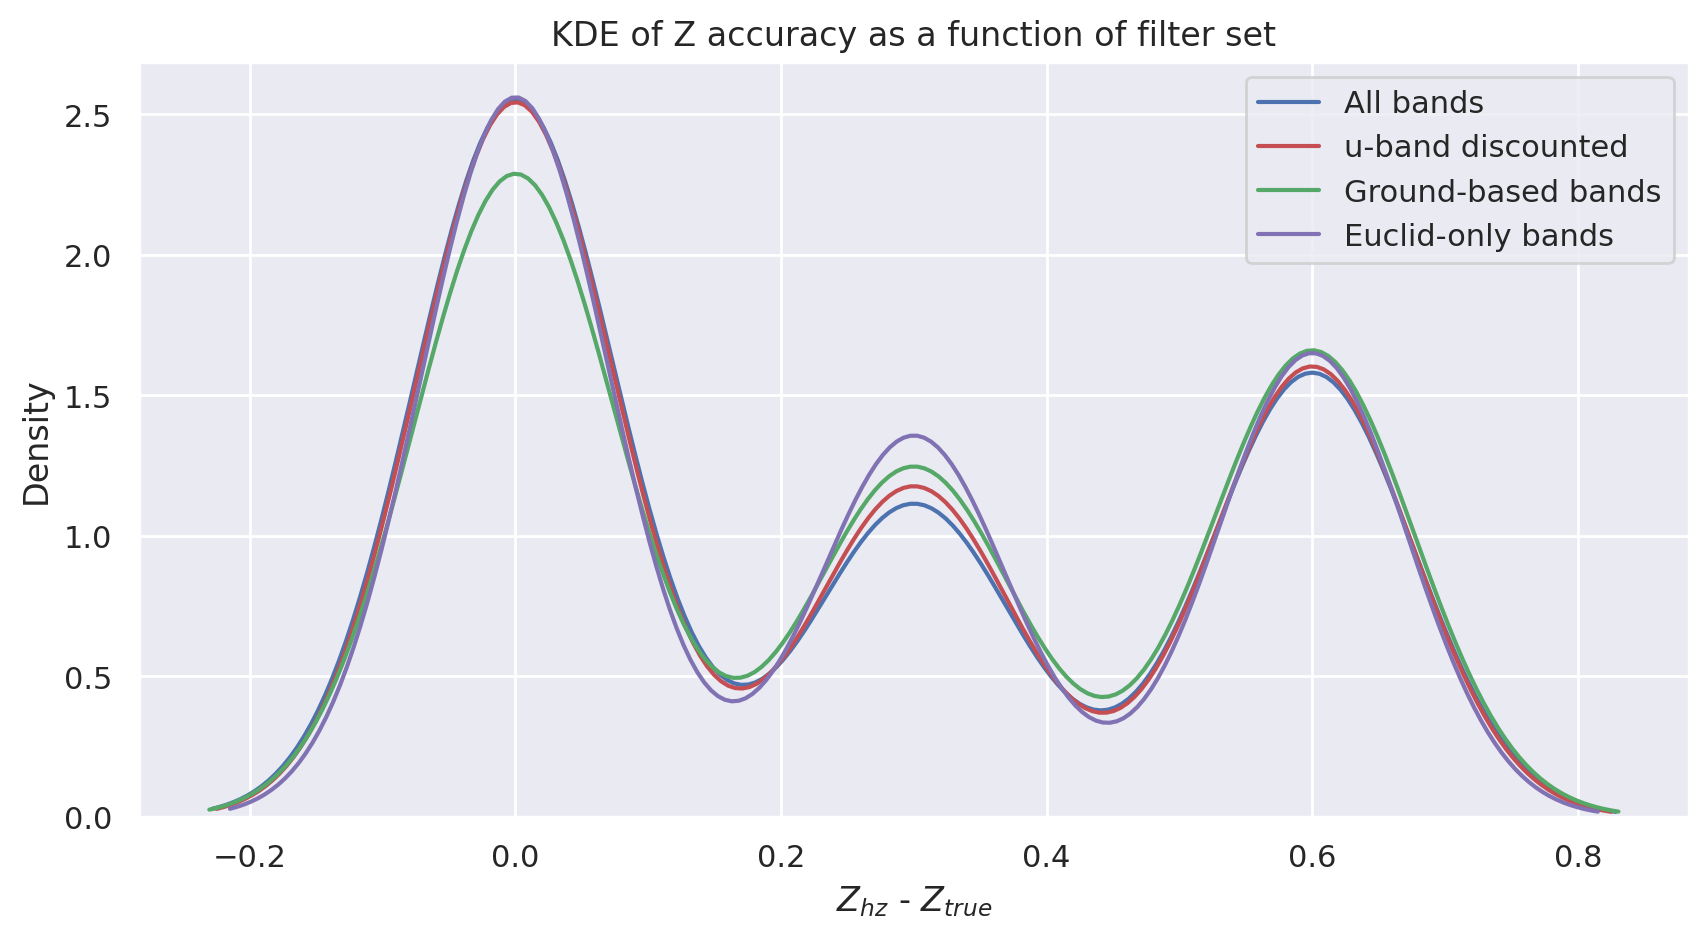

In [63]:
plt.figure(figsize=(10,5))
plt.title(r'KDE of Z accuracy as a function of filter set')
sns.kdeplot(all_Z_diff[all_zmass_df['Z/H'] > 0], label='All bands')
sns.kdeplot(nou_Z_diff[nou_zmass_df['Z/H'] > 0], color='r', label='u-band discounted')
sns.kdeplot(gnd_Z_diff[gnd_zmass_df['Z/H'] > 0], color='g', label='Ground-based bands')
sns.kdeplot(euc_Z_diff[euc_zmass_df['Z/H'] > 0], color='m', label='Euclid-only bands')
plt.legend()
plt.xlabel(r'$Z_{hz}$ - $Z_{true}$')
#plt.ylim(0, 0.5)

#plt.savefig('KDE_Av.png', format='png')

### $P(\chi^2)$ distributions

<AxesSubplot:>

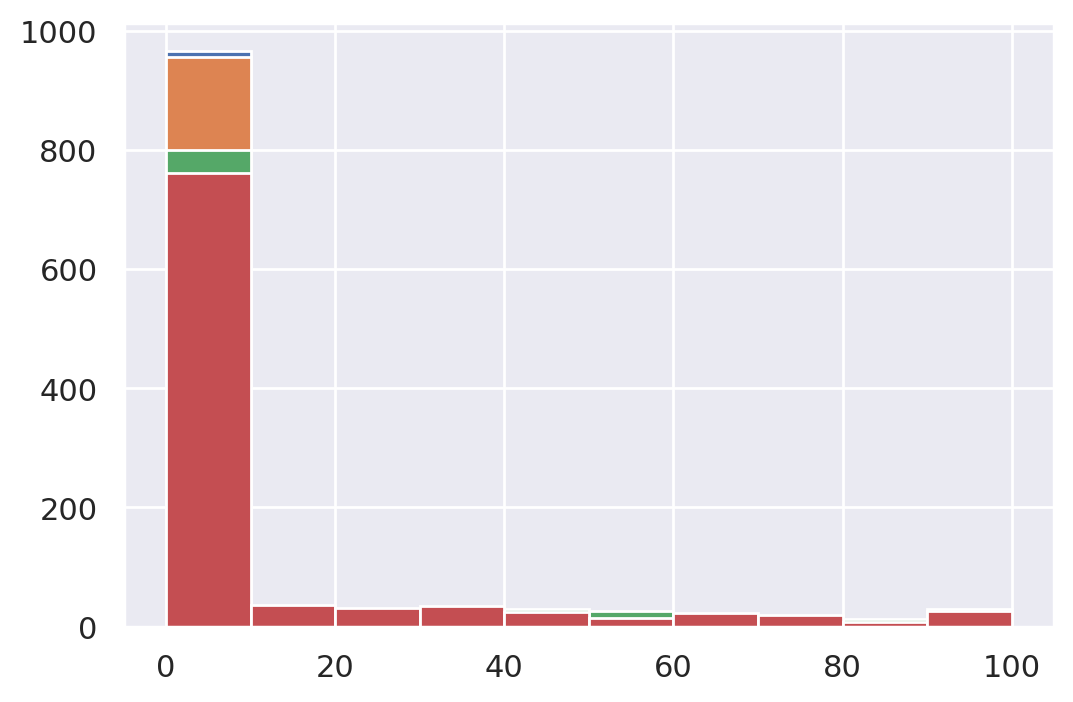

In [53]:
all_zmass_df['P_chi2'].hist()
nou_zmass_df['P_chi2'].hist()
gnd_zmass_df['P_chi2'].hist()
euc_zmass_df['P_chi2'].hist()

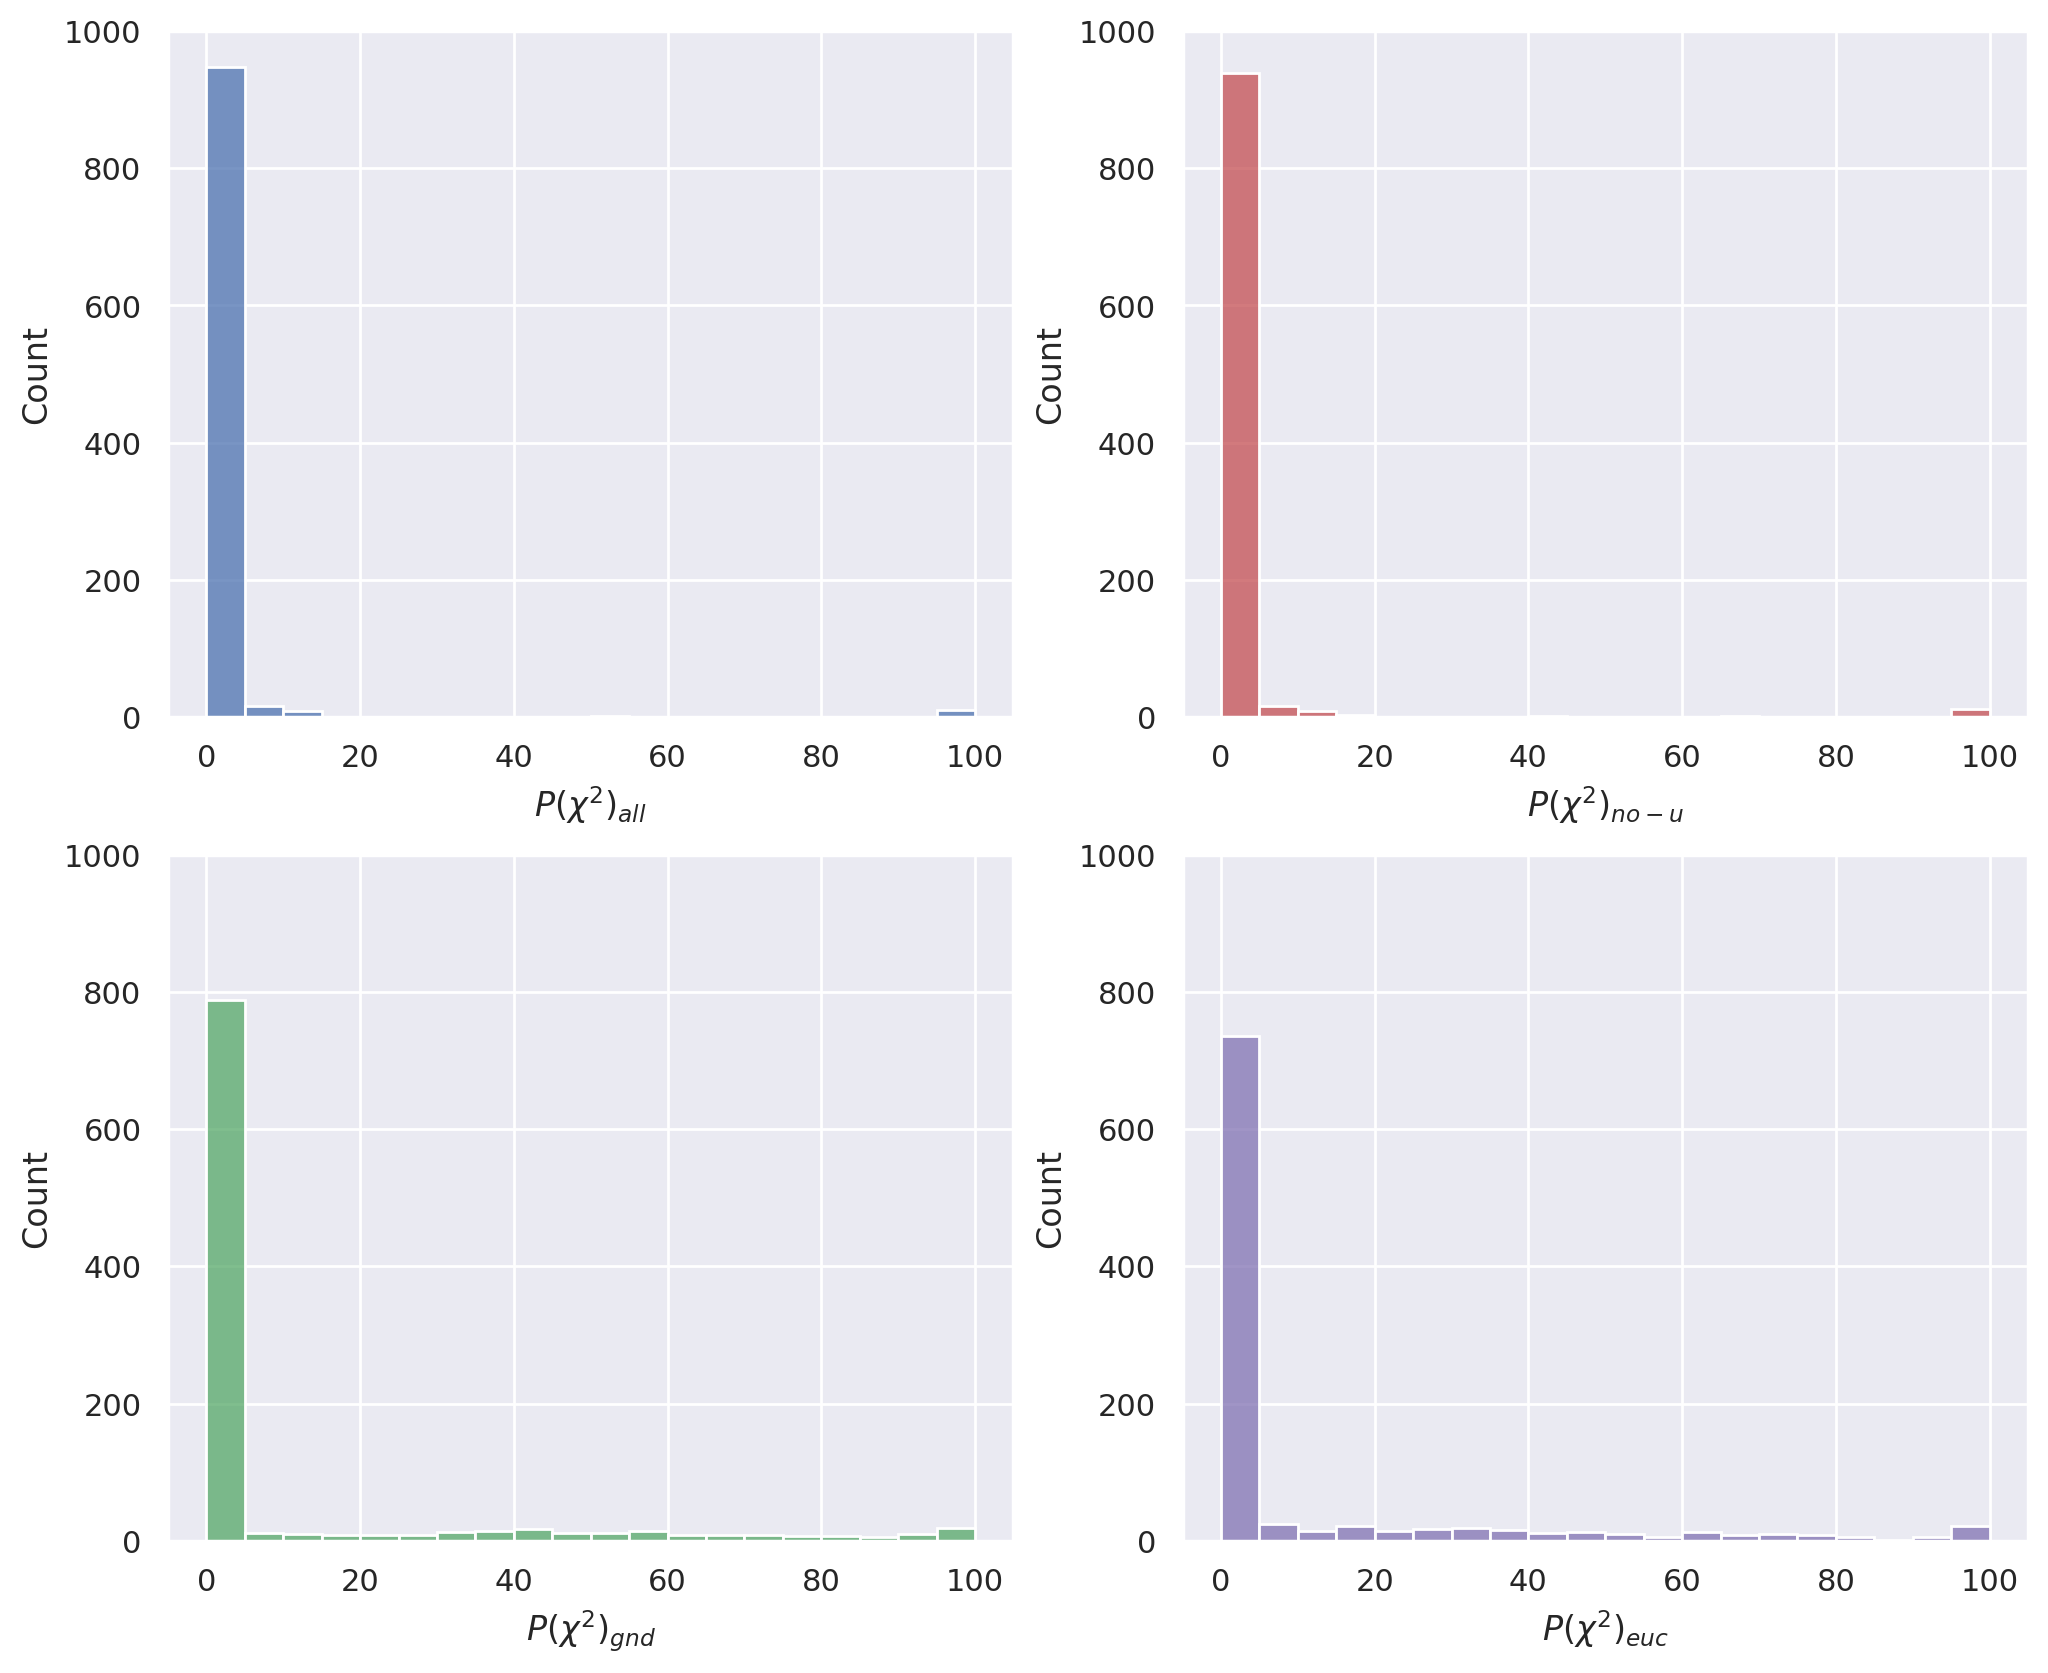

In [62]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.histplot(all_zmass_df['P_chi2'], binwidth=5, binrange=(0, 100))
plt.xlabel(r'$P(\chi^2)_{all}$')
plt.ylim(0, 1000)

plt.subplot(222)
sns.histplot(nou_zmass_df['P_chi2'], binwidth=5, binrange=(0, 100), color='r')
plt.xlabel(r'$P(\chi^2)_{no-u}$')
plt.ylim(0, 1000)

plt.subplot(223)
sns.histplot(gnd_zmass_df['P_chi2'], binwidth=5, binrange=(0, 100), color='g')
plt.xlabel(r'$P(\chi^2)_{gnd}$')
plt.ylim(0, 1000)

plt.subplot(224)
sns.histplot(euc_zmass_df['P_chi2'], binwidth=5, binrange=(0, 100), color='m')
plt.xlabel(r'$P(\chi^2)_{euc}$')
plt.ylim(0, 1000)

plt.show()